In [1]:
import json
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [2]:
# Filling frames with lines from .txt file. Each line is a dictionary, 
# which is a line in source .txt dataset. Line is in JSON format
frames = []
data = []
data_init = []
for line in open('20210507_1605_3078.txt', 'r'):
    frames.append(json.loads(line))

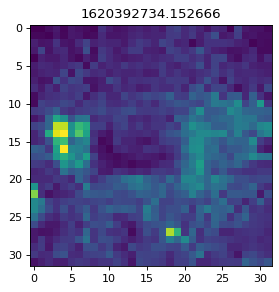

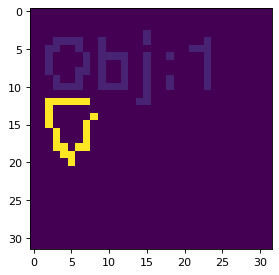

0


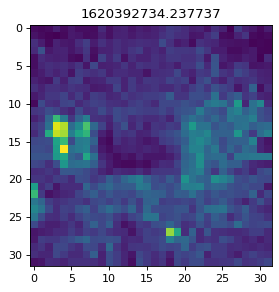

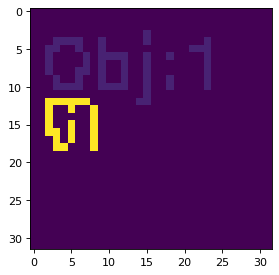

1


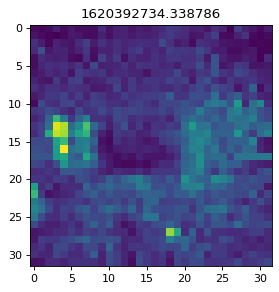

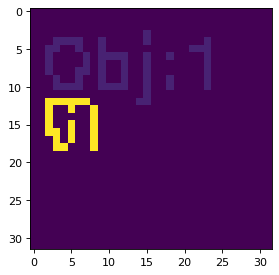

2


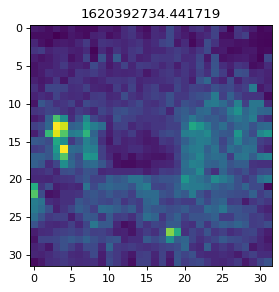

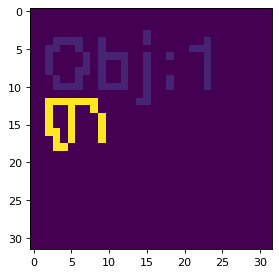

3


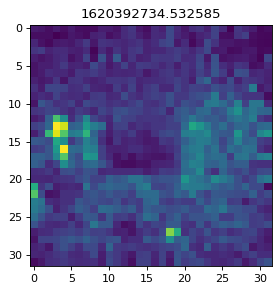

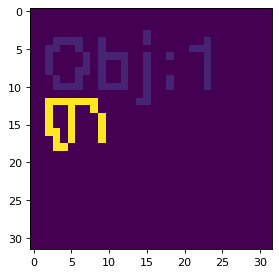

4


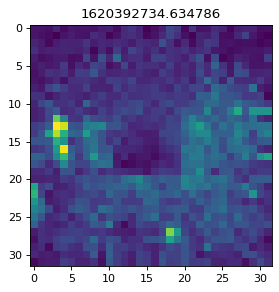

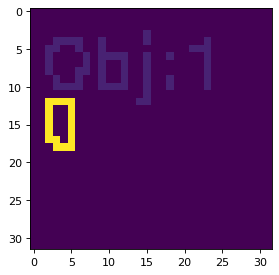

5


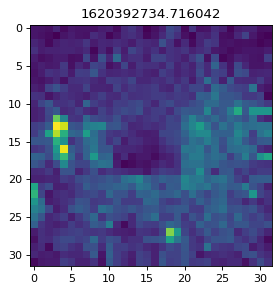

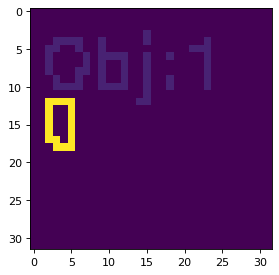

6


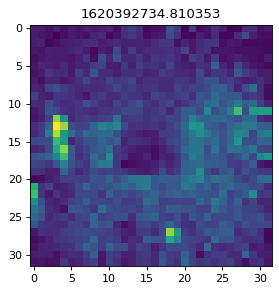

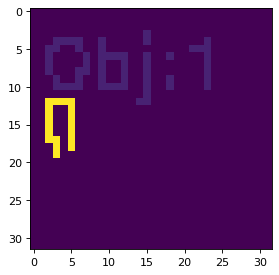

7


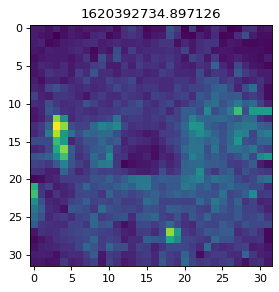

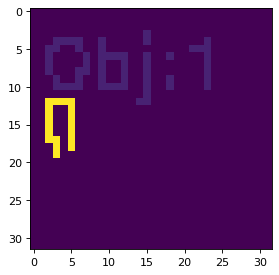

8


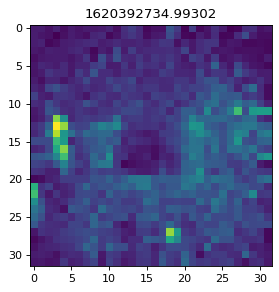

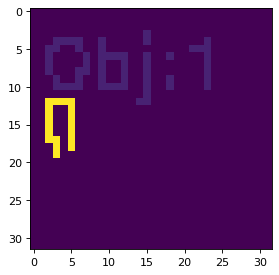

9


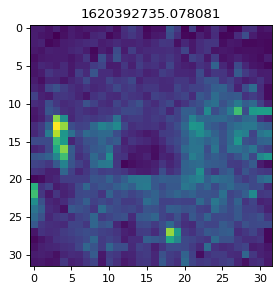

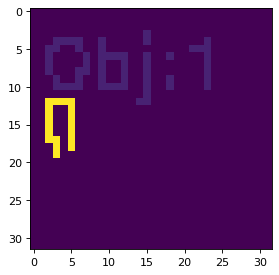

10


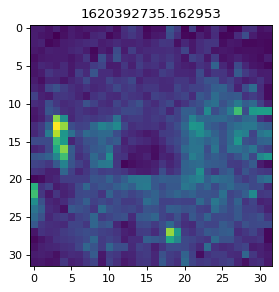

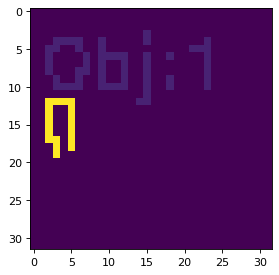

11


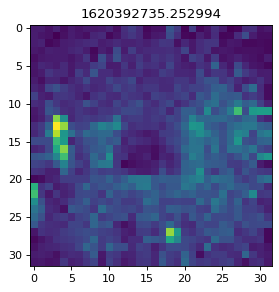

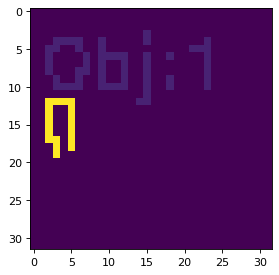

12


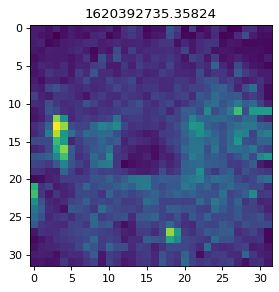

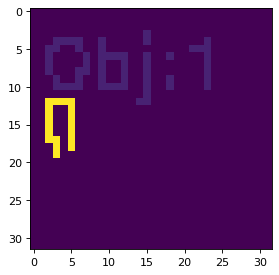

13


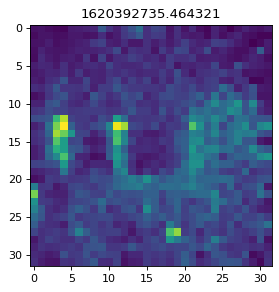

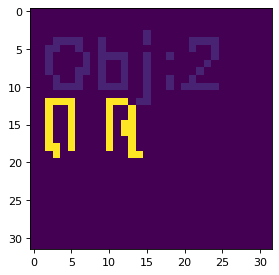

14


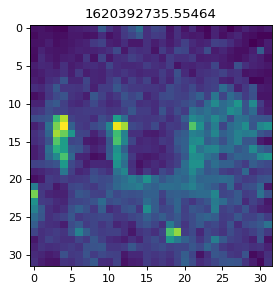

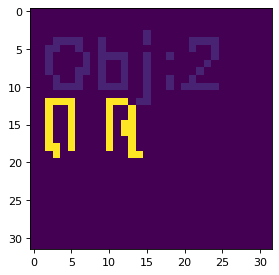

15


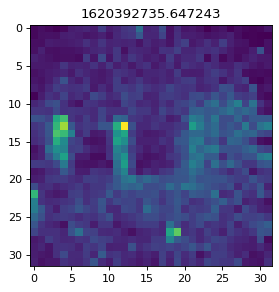

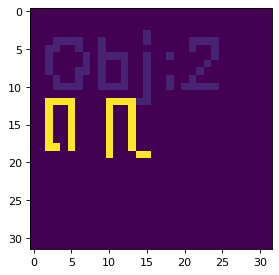

16


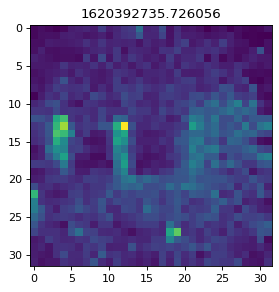

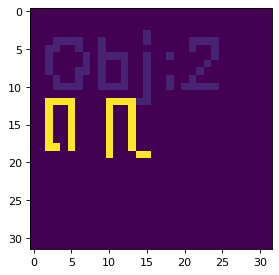

17


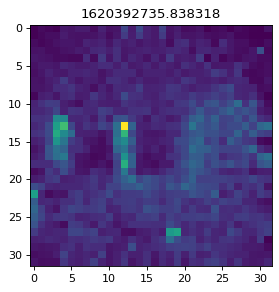

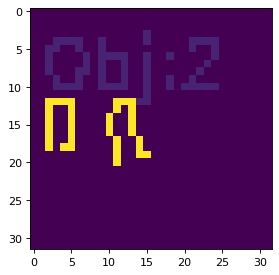

18


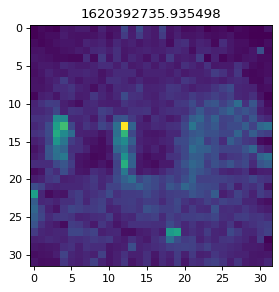

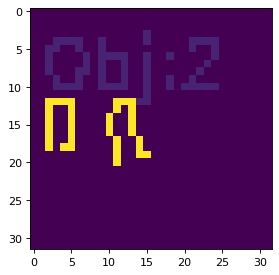

19


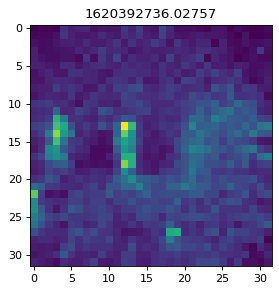

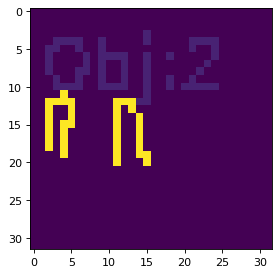

20


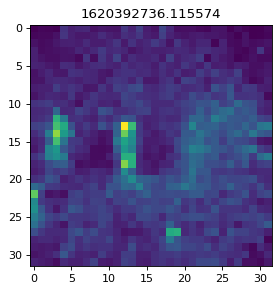

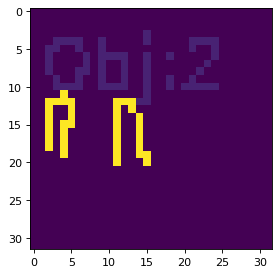

21


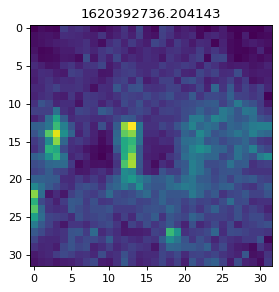

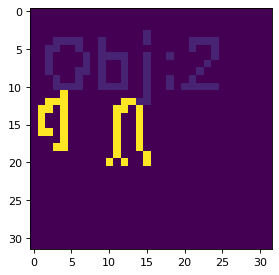

22


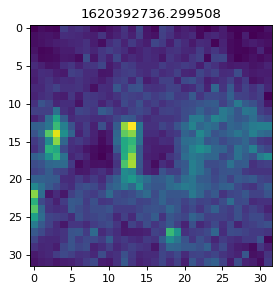

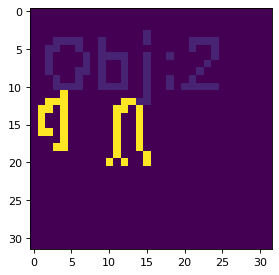

23


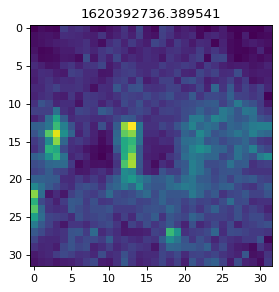

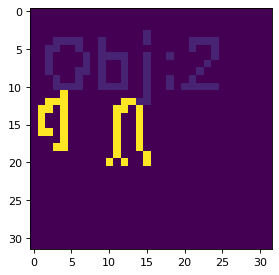

24


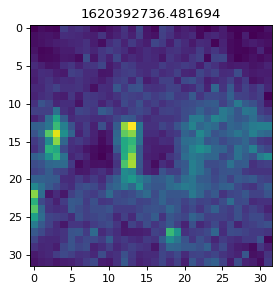

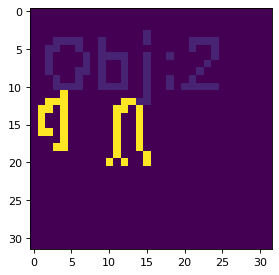

25


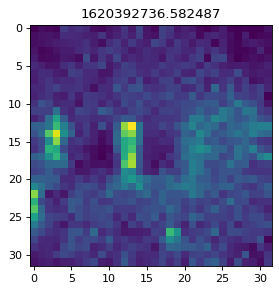

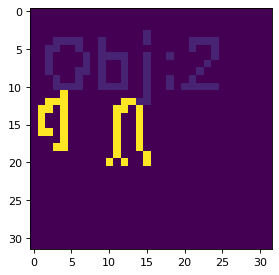

26


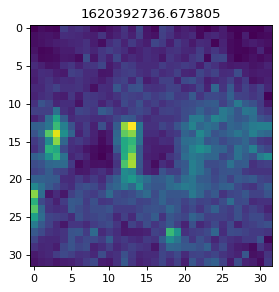

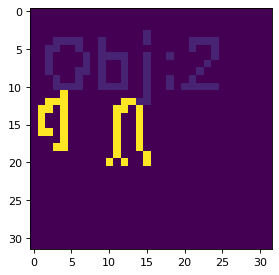

27


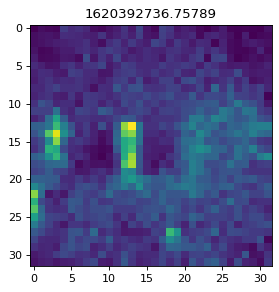

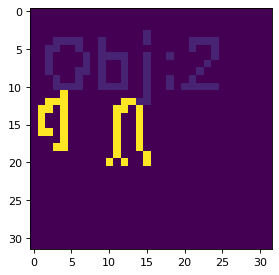

28


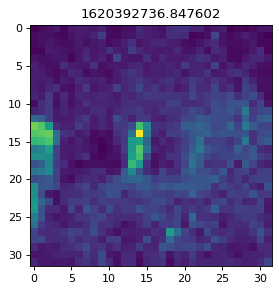

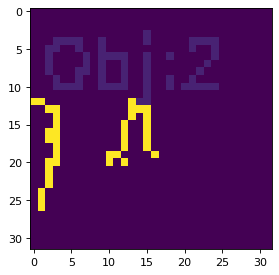

29


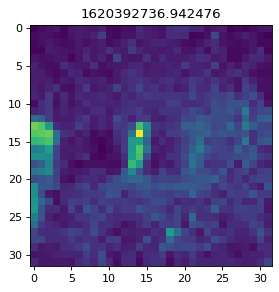

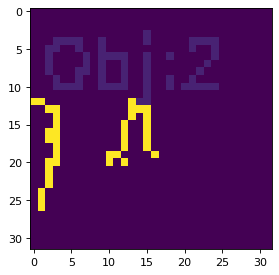

30


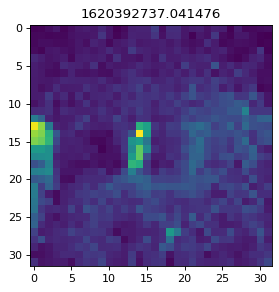

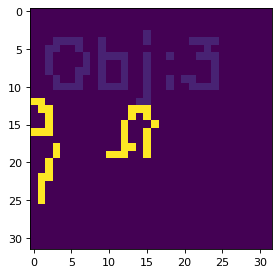

31


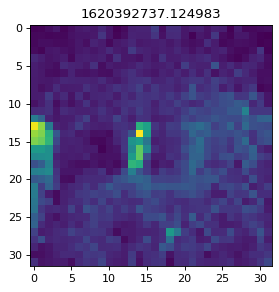

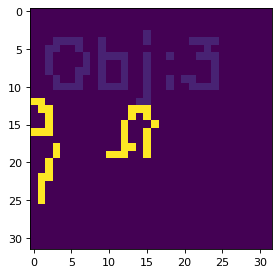

32


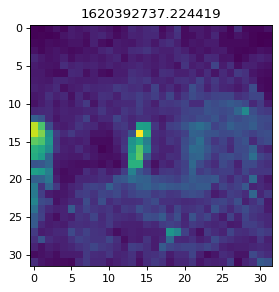

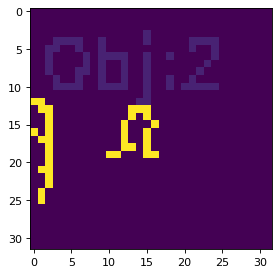

33


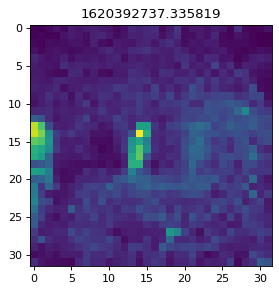

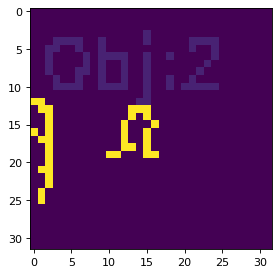

34


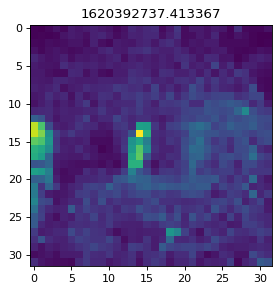

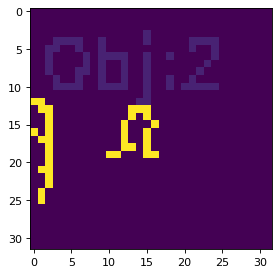

35


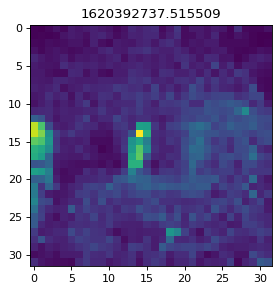

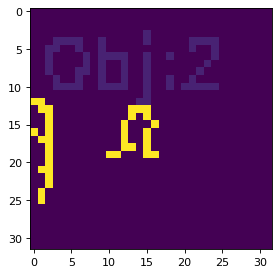

36


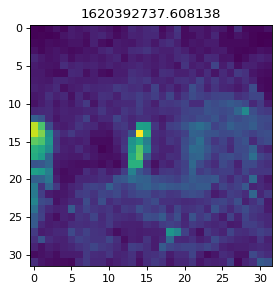

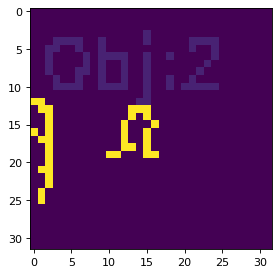

37


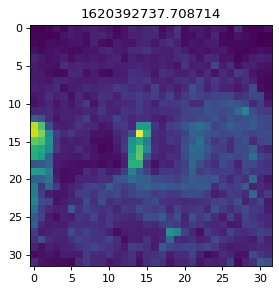

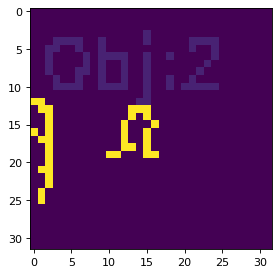

38


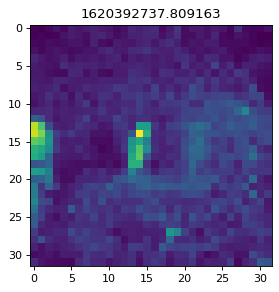

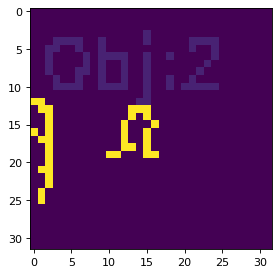

39


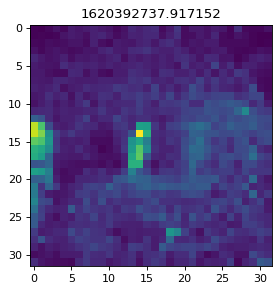

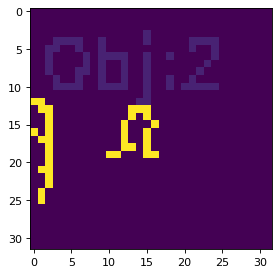

40


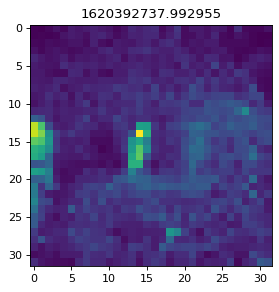

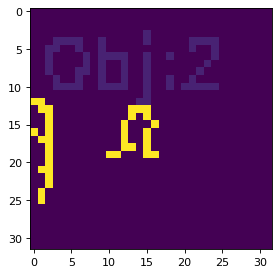

41


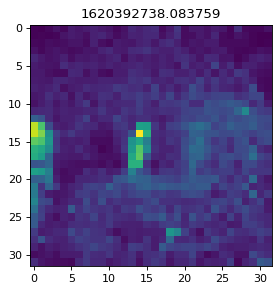

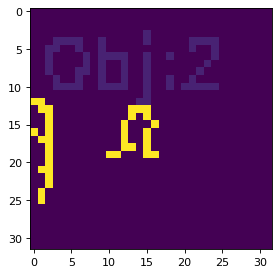

42


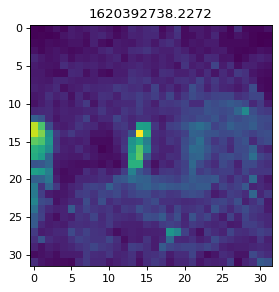

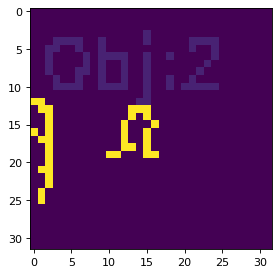

43


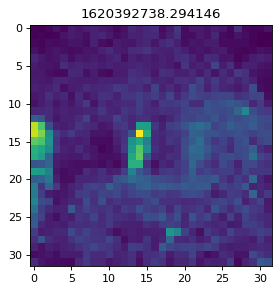

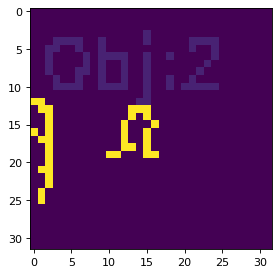

44


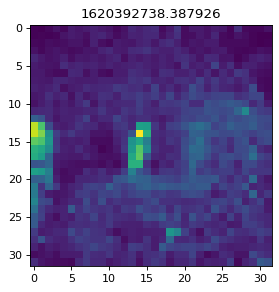

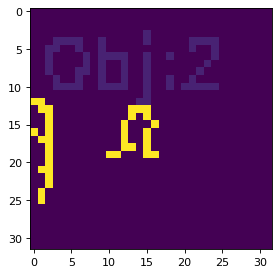

45


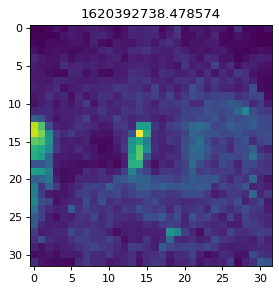

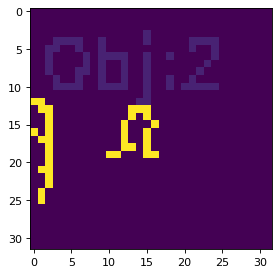

46


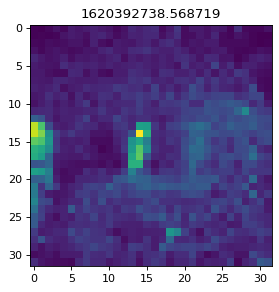

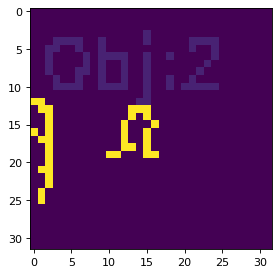

47


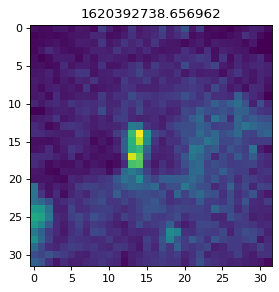

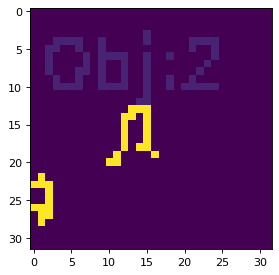

48


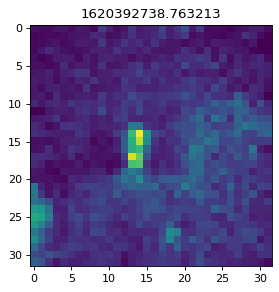

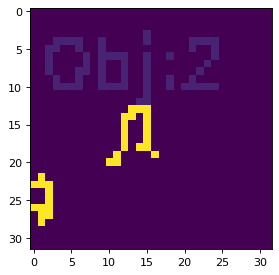

49


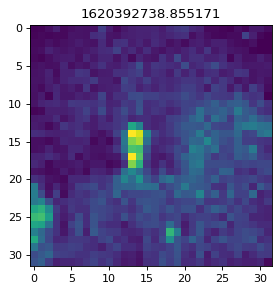

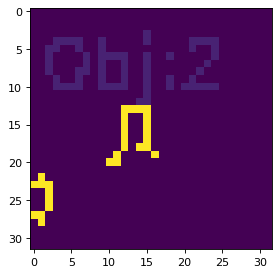

50


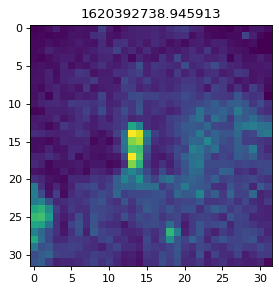

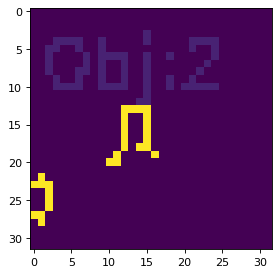

51


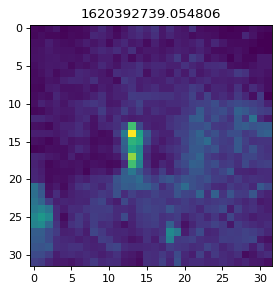

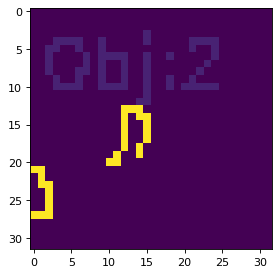

52


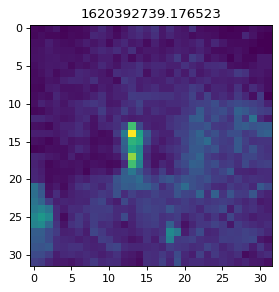

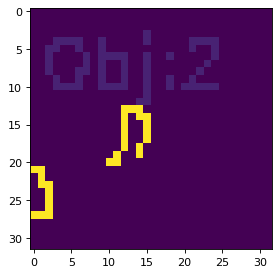

53


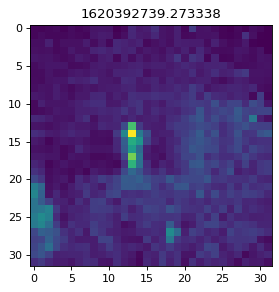

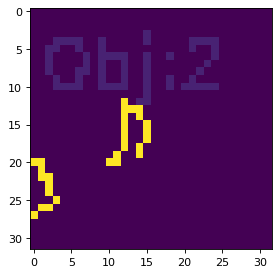

54


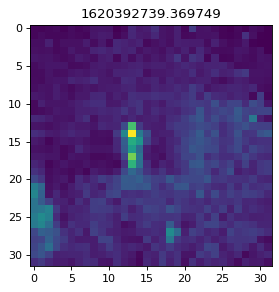

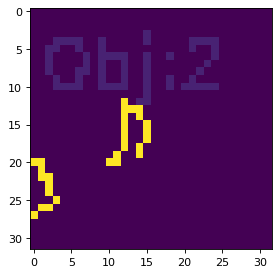

55


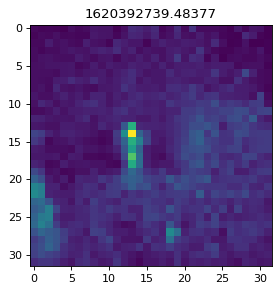

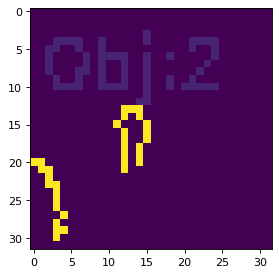

56


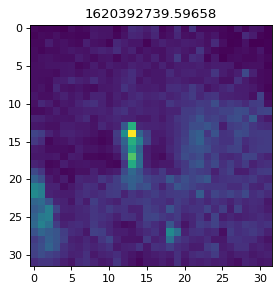

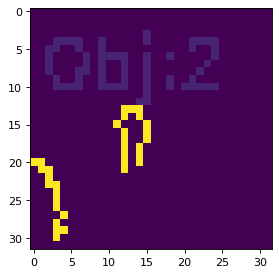

57


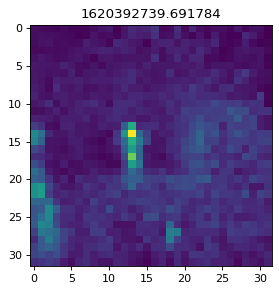

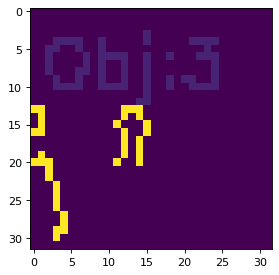

58


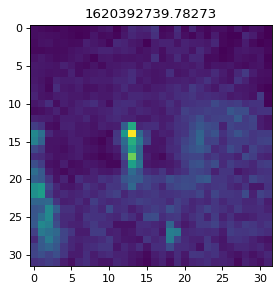

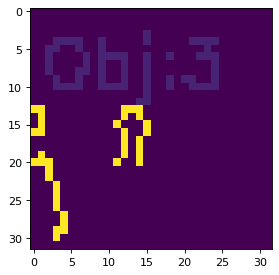

59


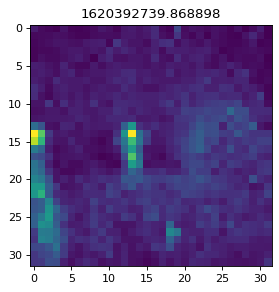

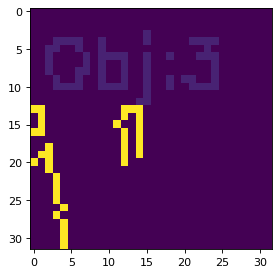

60


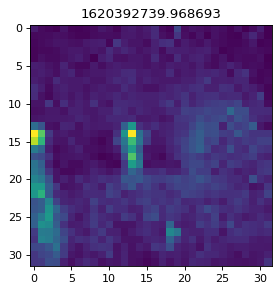

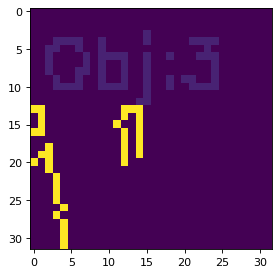

61


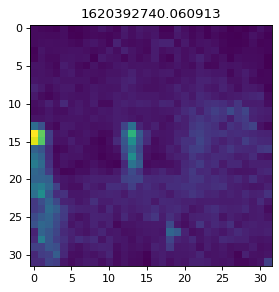

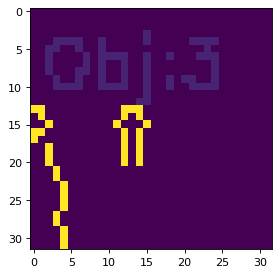

62


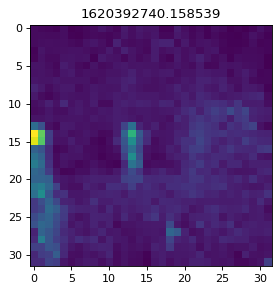

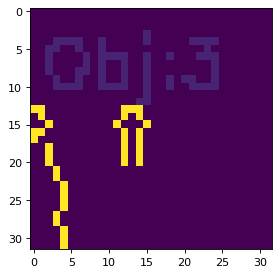

63


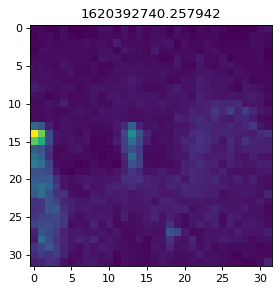

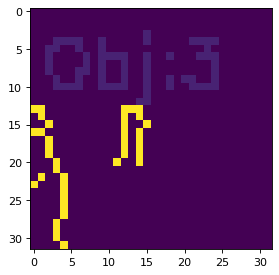

64


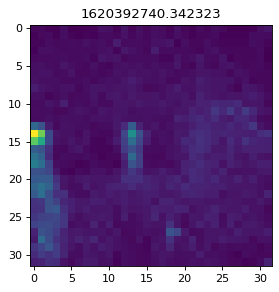

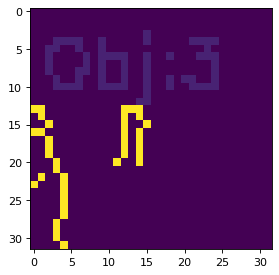

65


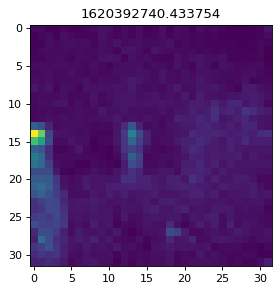

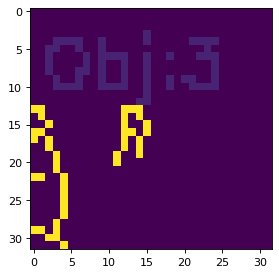

66


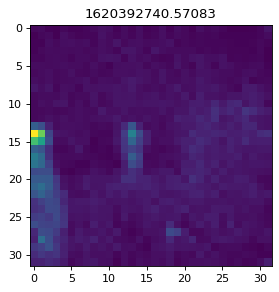

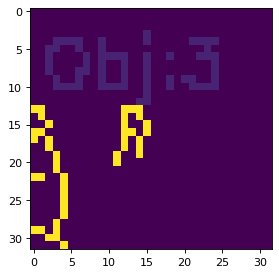

67


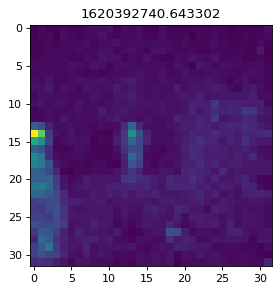

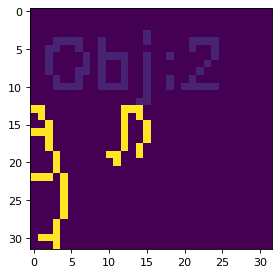

68


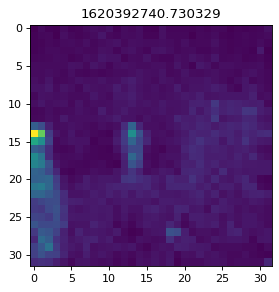

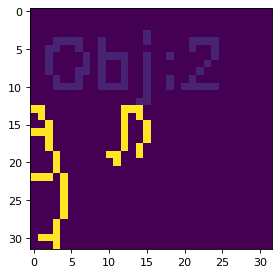

69


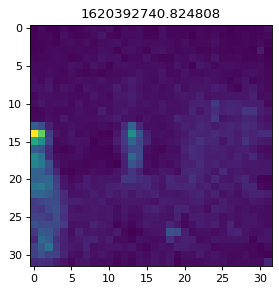

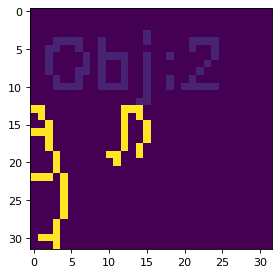

70


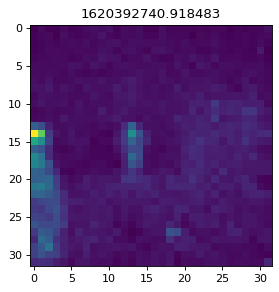

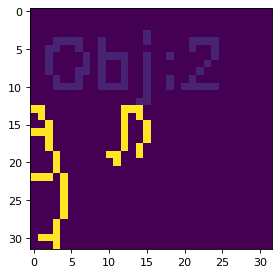

71


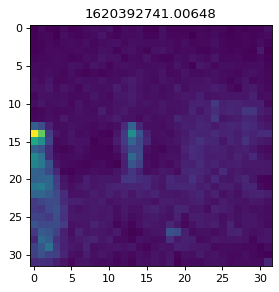

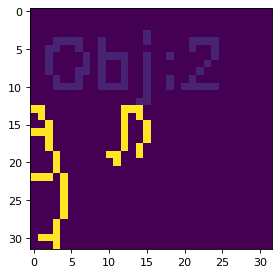

72


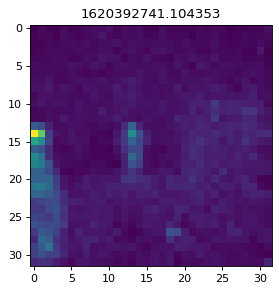

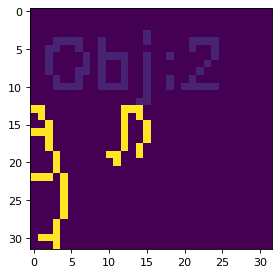

73


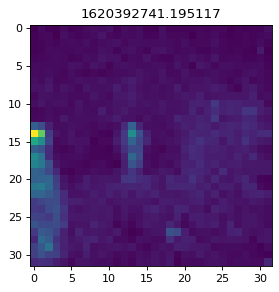

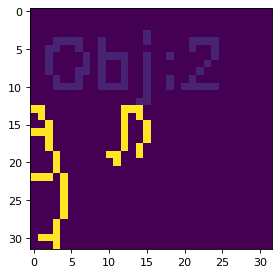

74


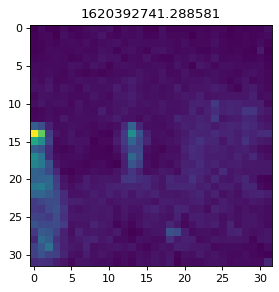

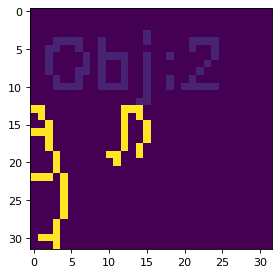

75


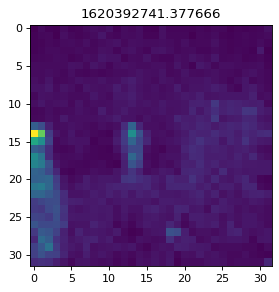

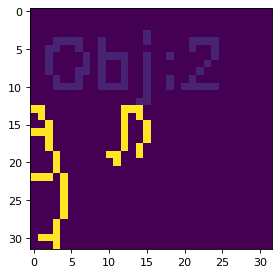

76


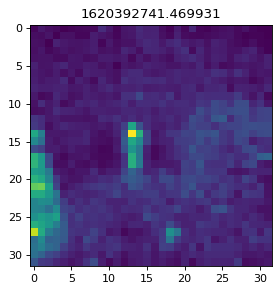

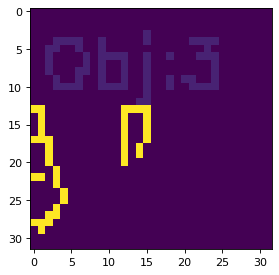

77


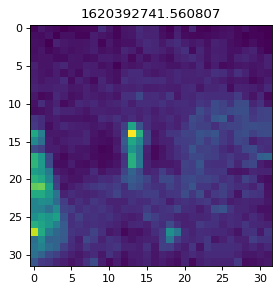

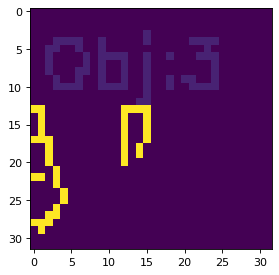

78


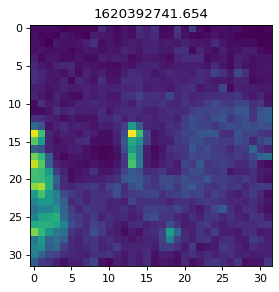

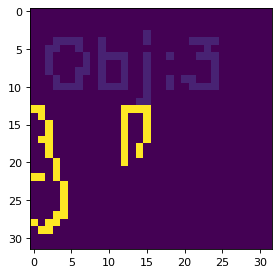

79


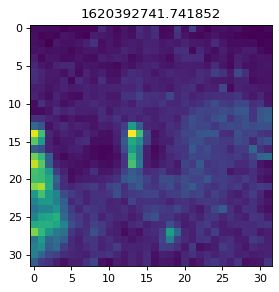

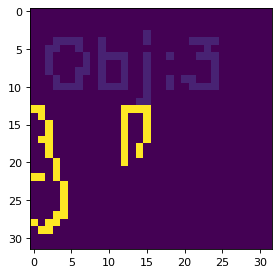

80


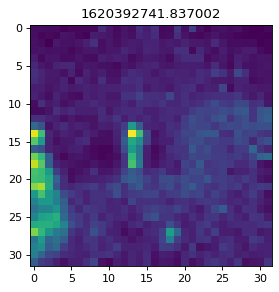

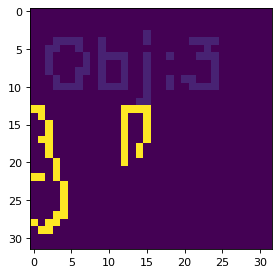

81


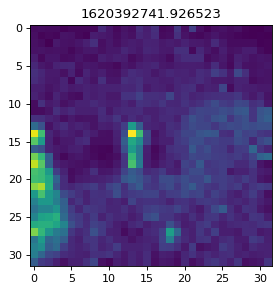

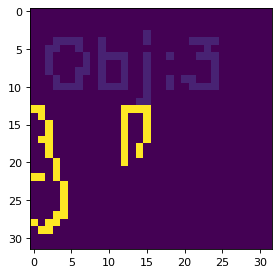

82


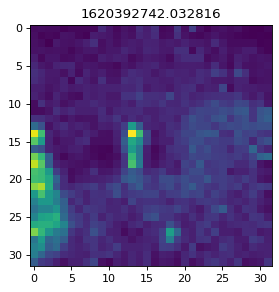

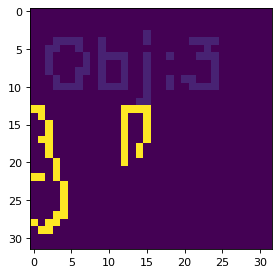

83


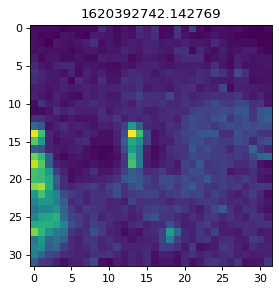

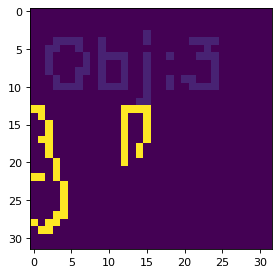

84


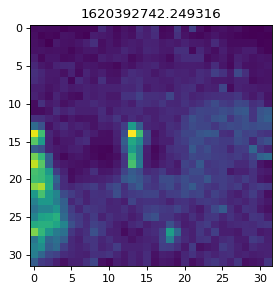

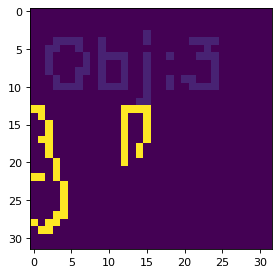

85


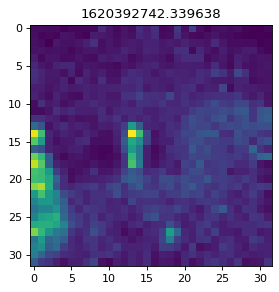

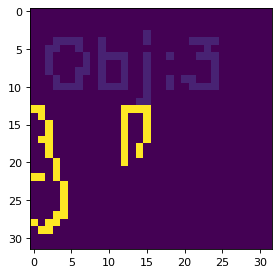

86


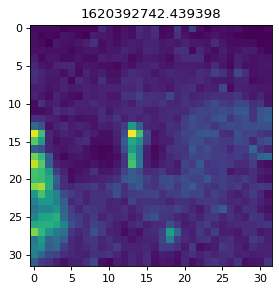

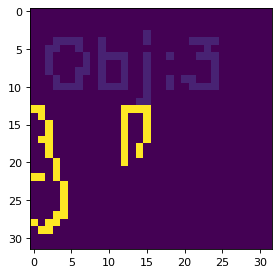

87


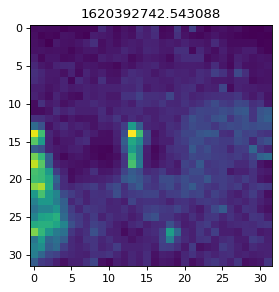

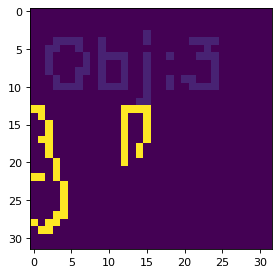

88


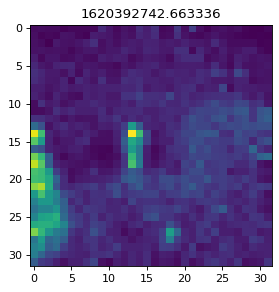

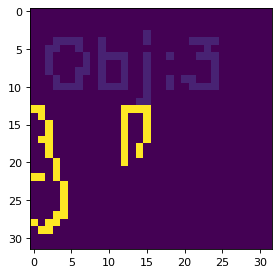

89


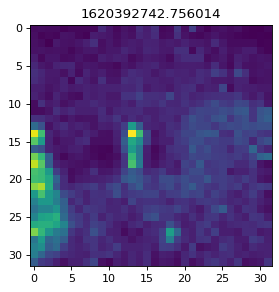

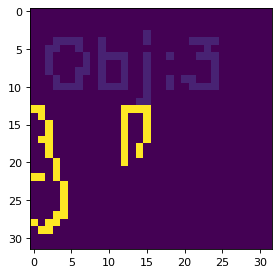

90


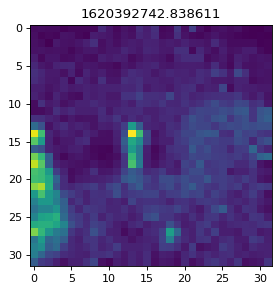

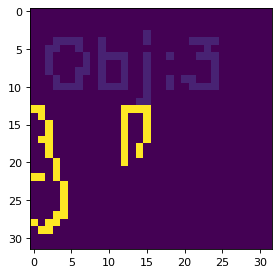

91


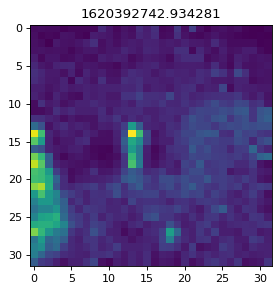

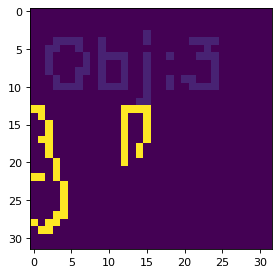

92


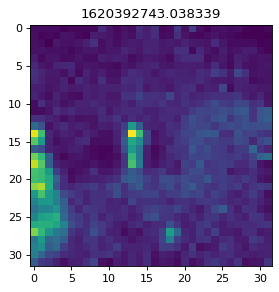

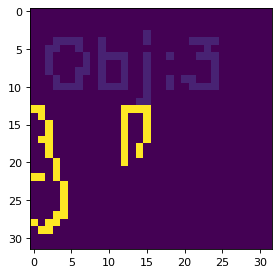

93


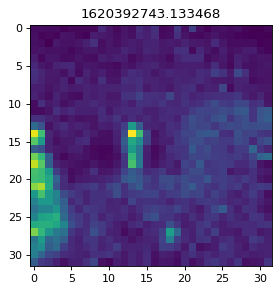

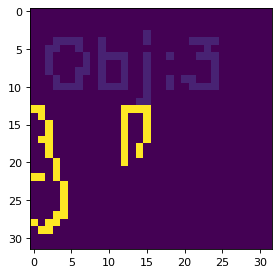

94


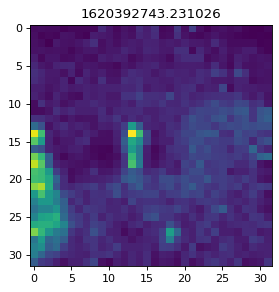

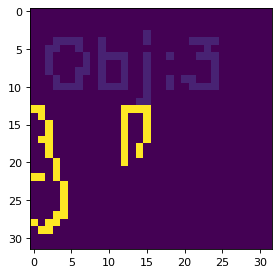

95


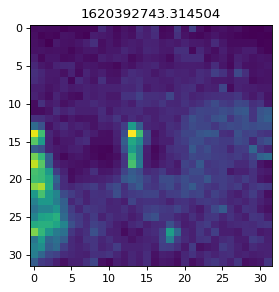

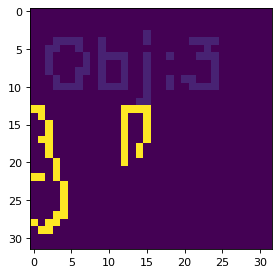

96


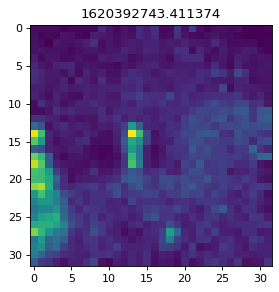

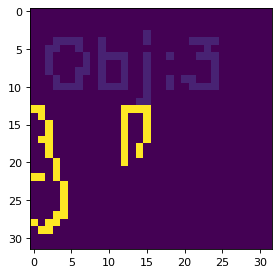

97


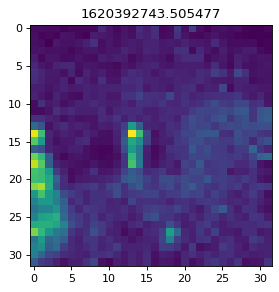

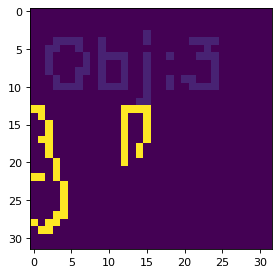

98


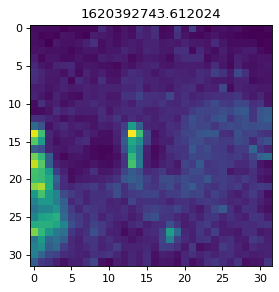

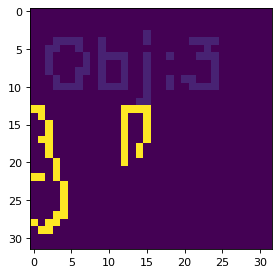

99


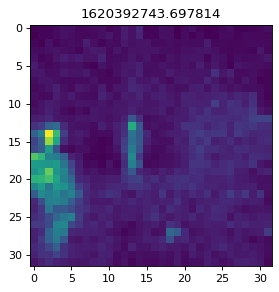

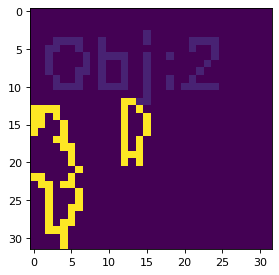

100


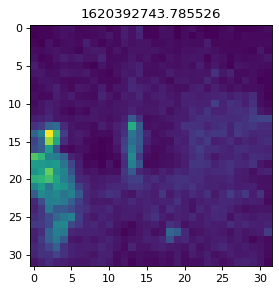

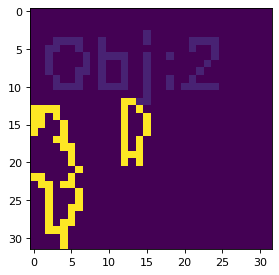

101


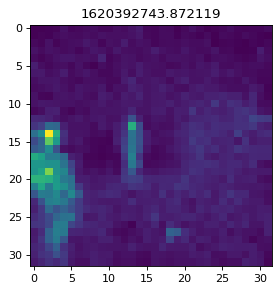

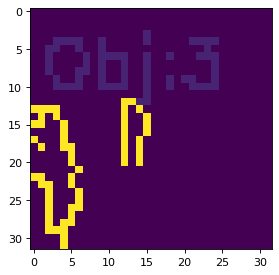

102


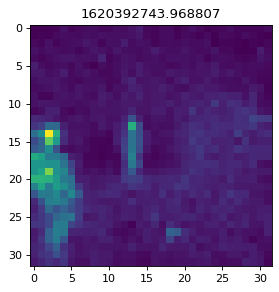

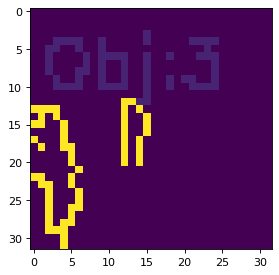

103


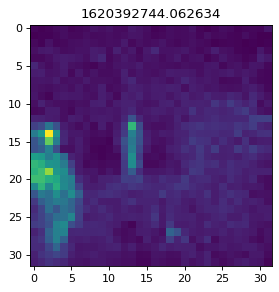

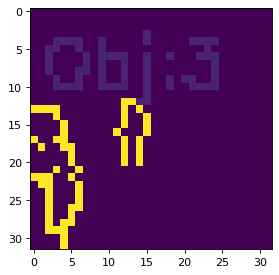

104


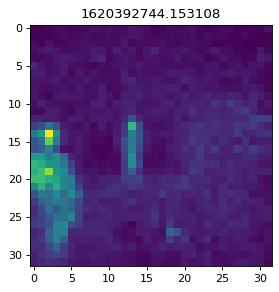

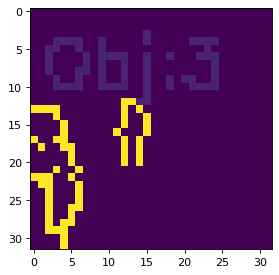

105


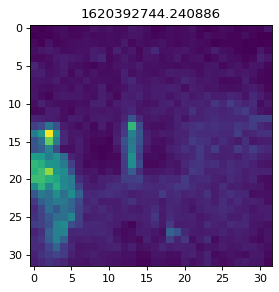

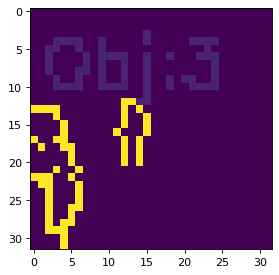

106


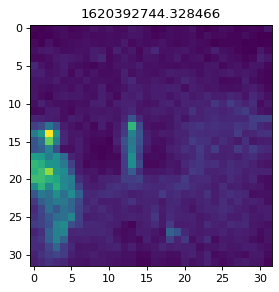

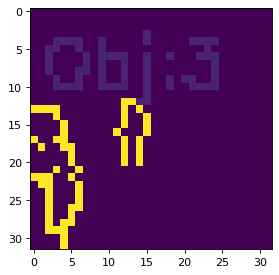

107


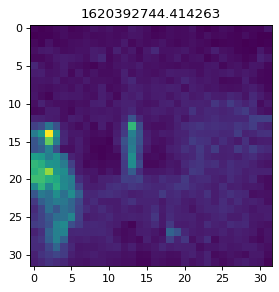

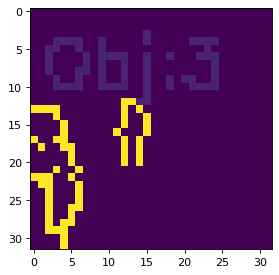

108


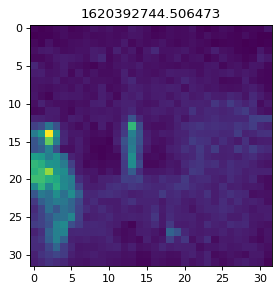

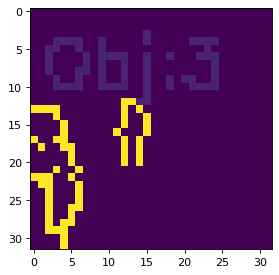

109


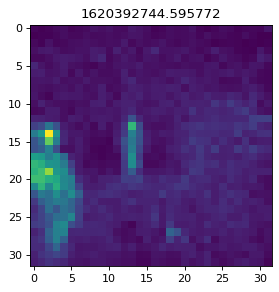

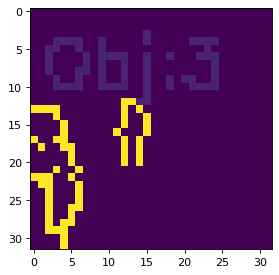

110


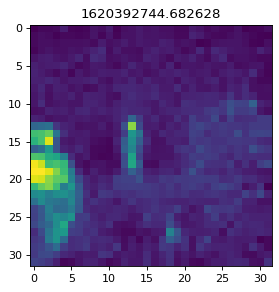

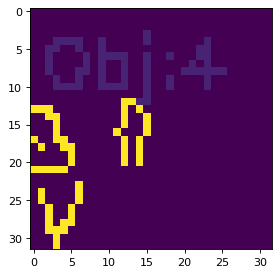

111


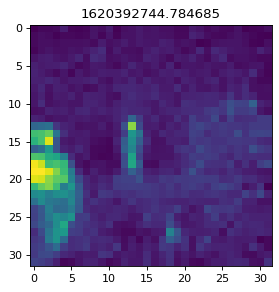

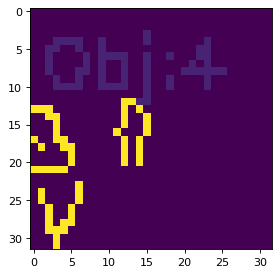

112


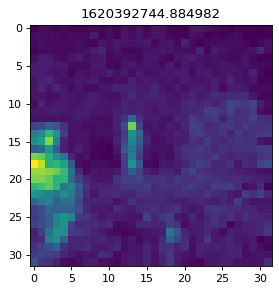

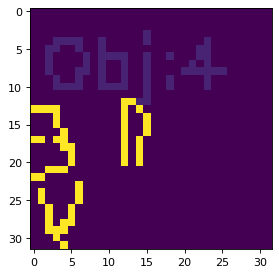

113


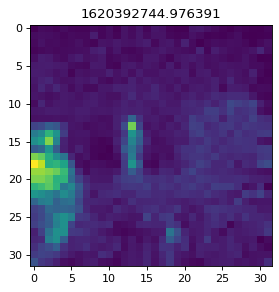

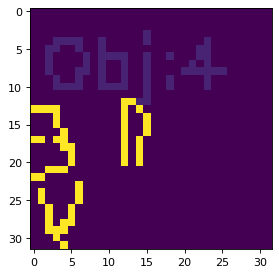

114


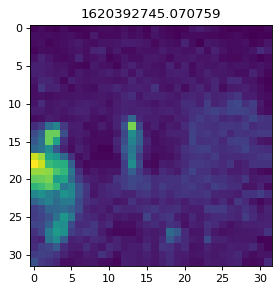

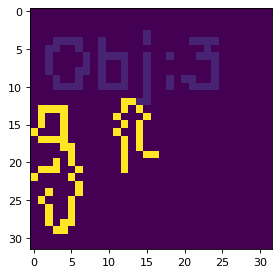

115


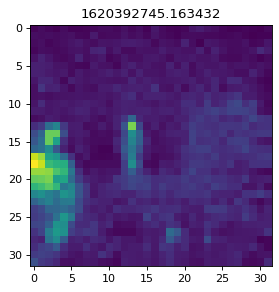

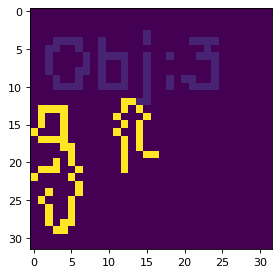

116


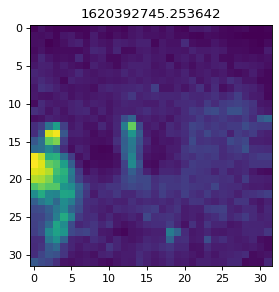

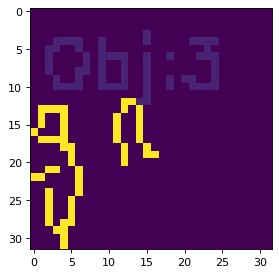

117


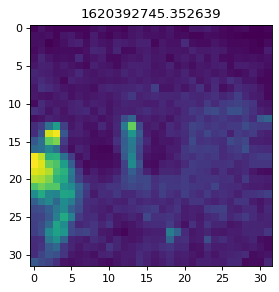

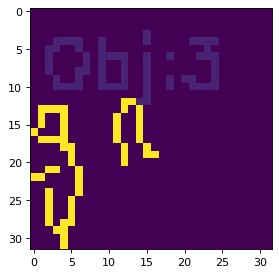

118


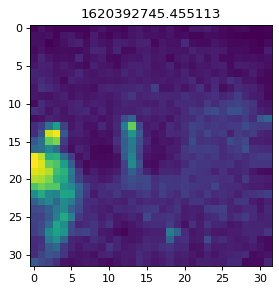

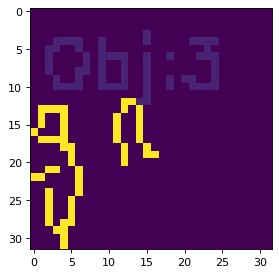

119


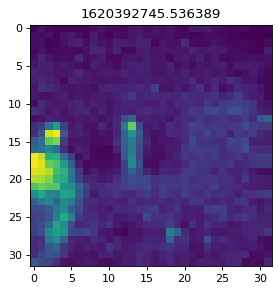

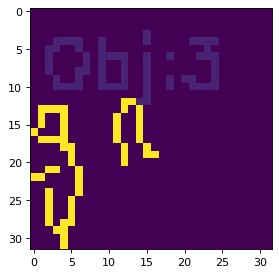

120


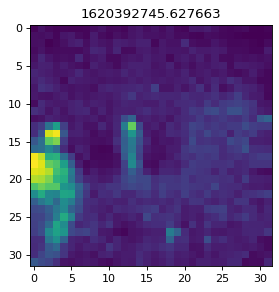

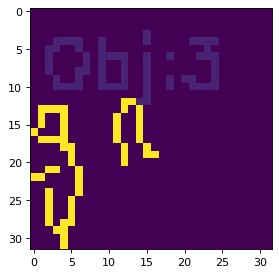

121


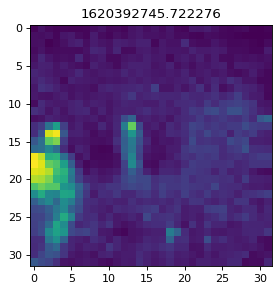

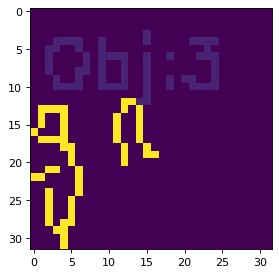

122


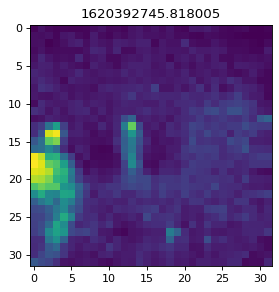

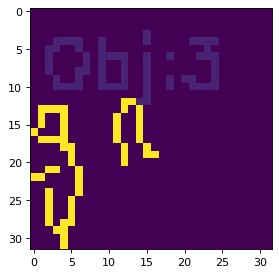

123


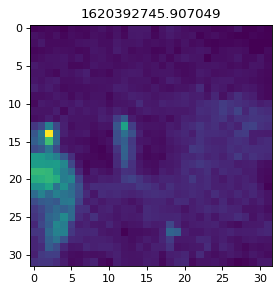

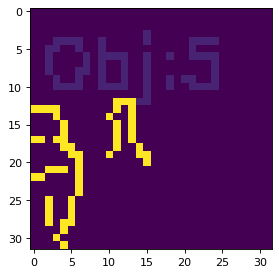

124


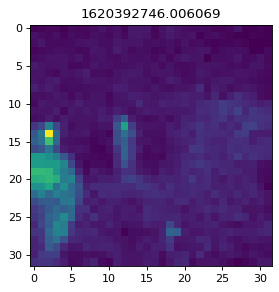

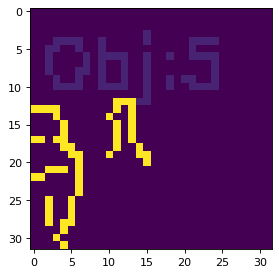

125


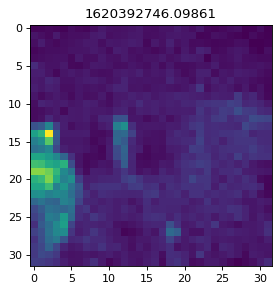

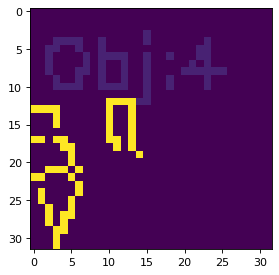

126


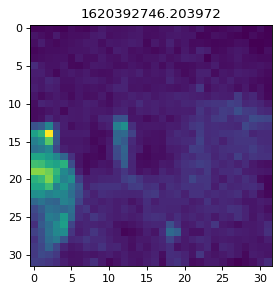

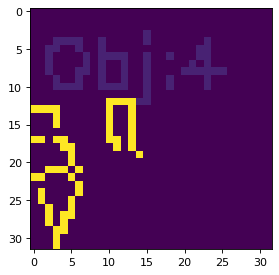

127


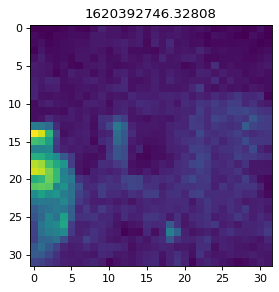

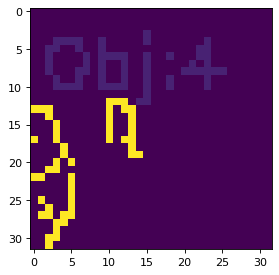

128


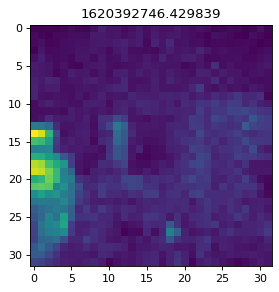

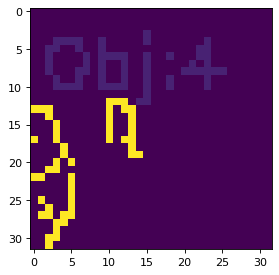

129


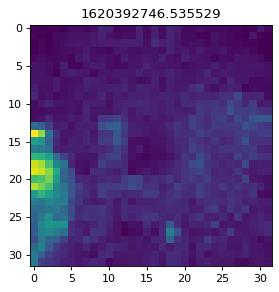

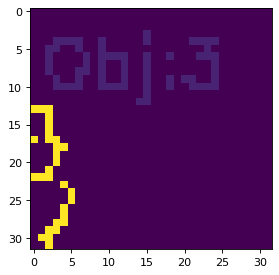

130


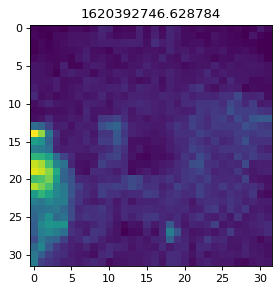

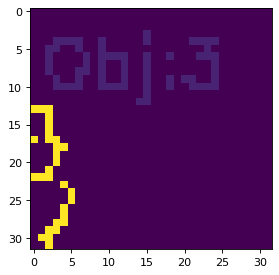

131


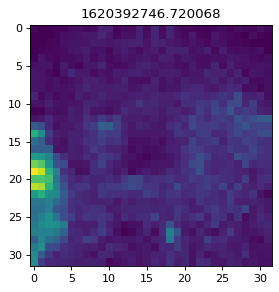

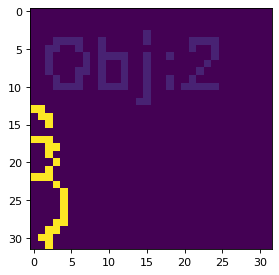

132


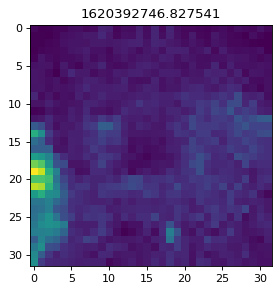

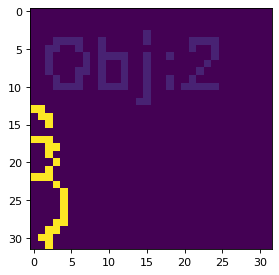

133


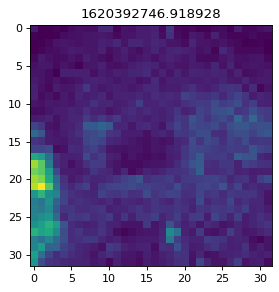

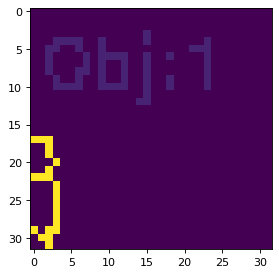

134


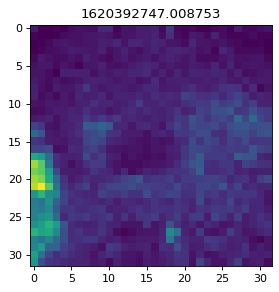

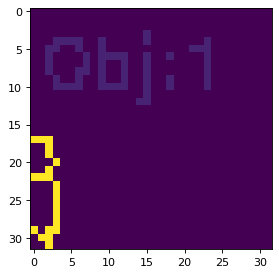

135


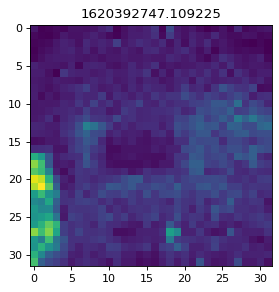

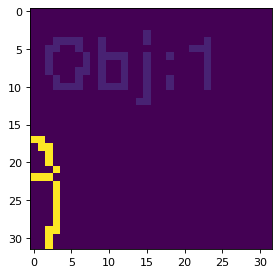

136


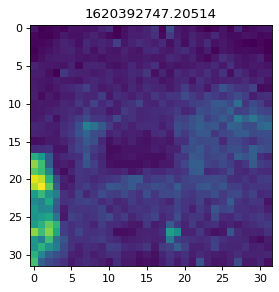

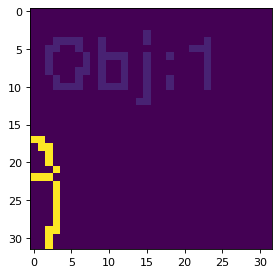

137


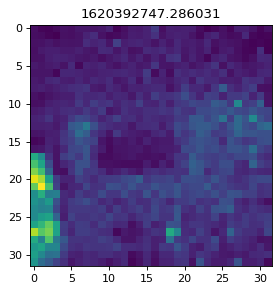

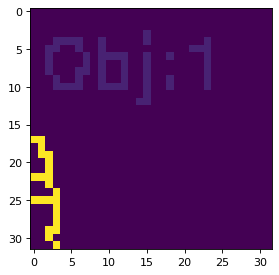

138


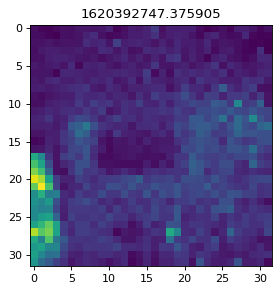

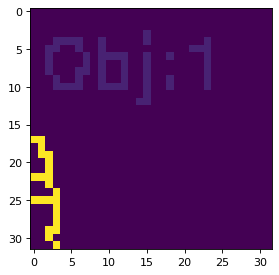

139


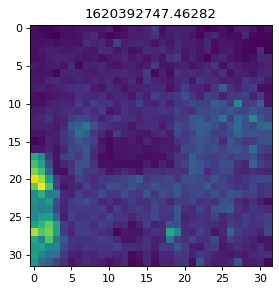

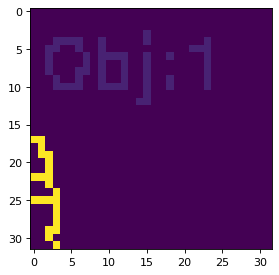

140


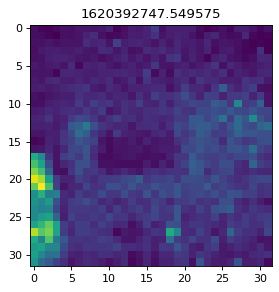

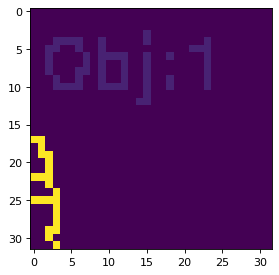

141


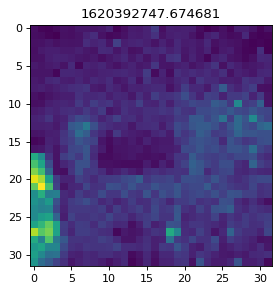

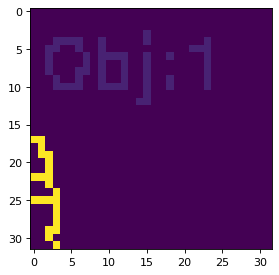

142


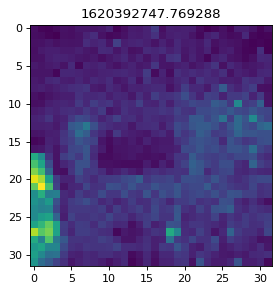

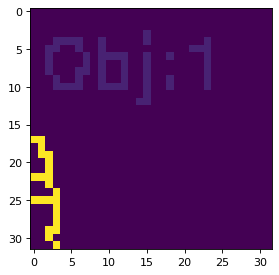

143


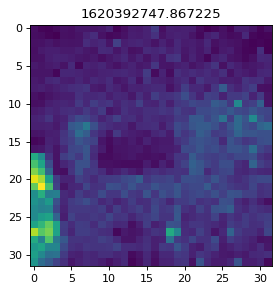

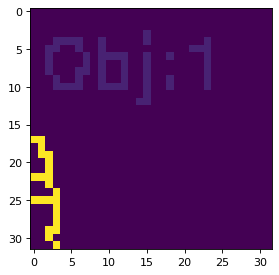

144


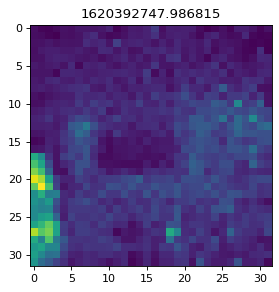

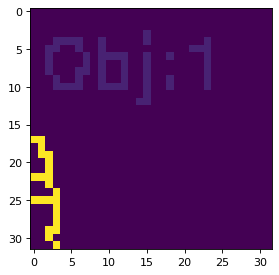

145


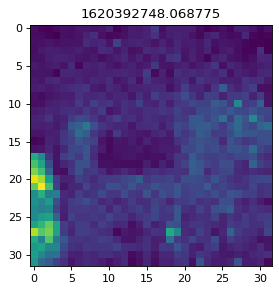

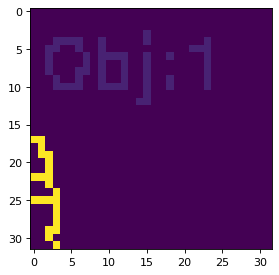

146


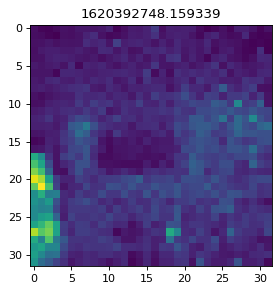

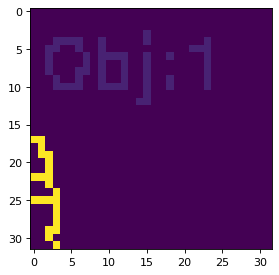

147


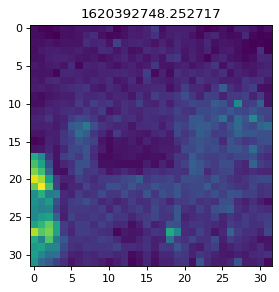

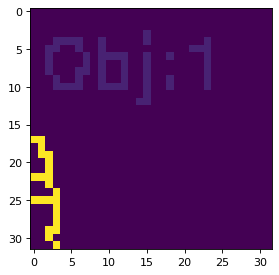

148


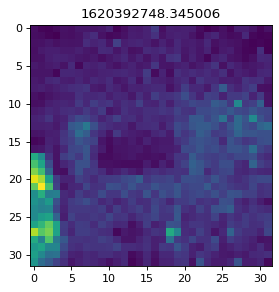

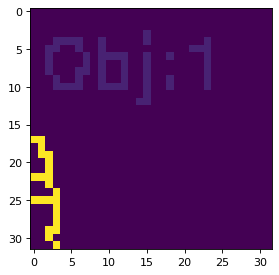

149


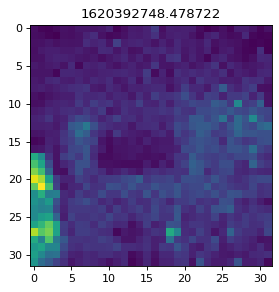

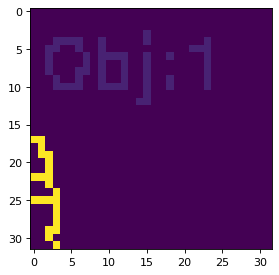

150


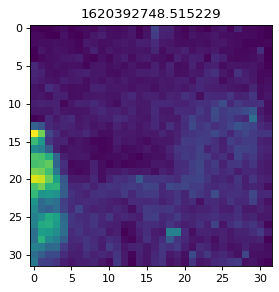

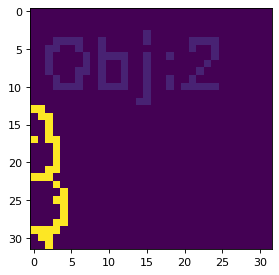

151


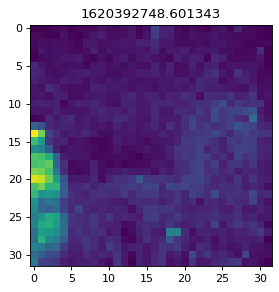

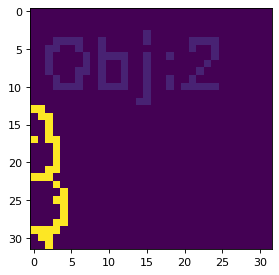

152


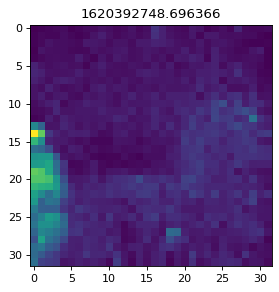

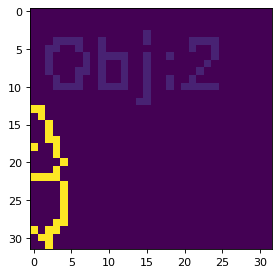

153


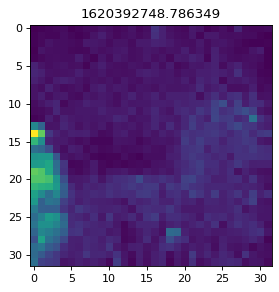

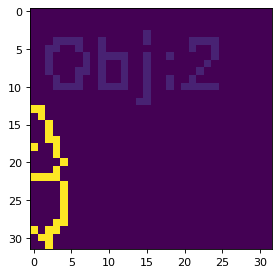

154


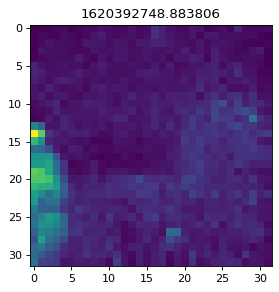

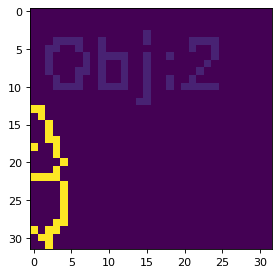

155


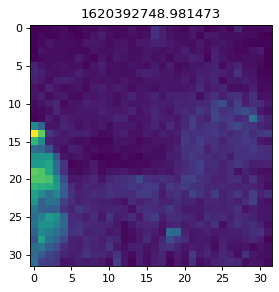

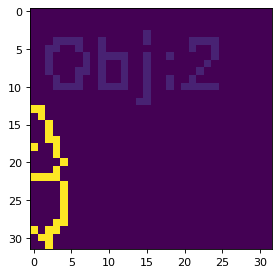

156


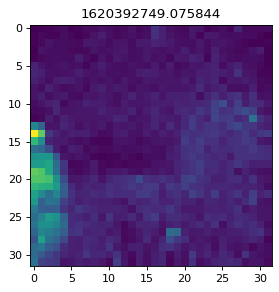

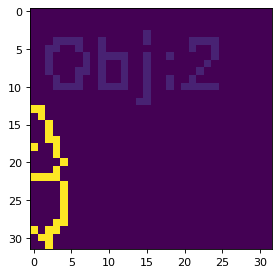

157


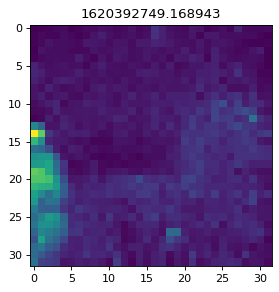

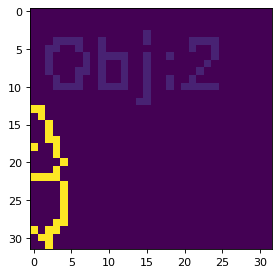

158


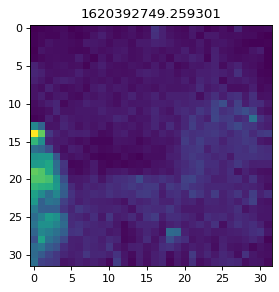

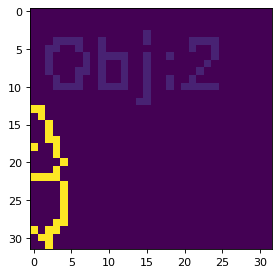

159


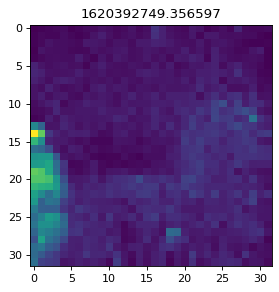

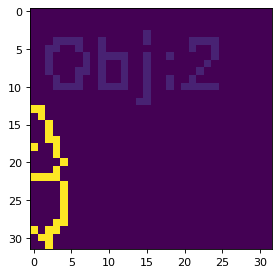

160


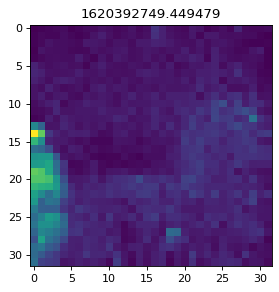

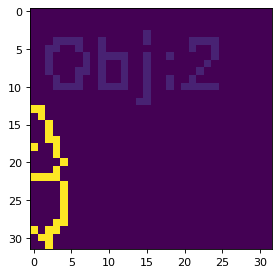

161


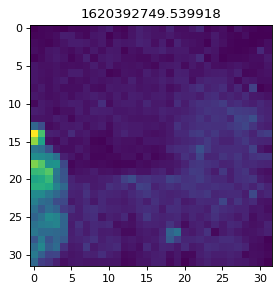

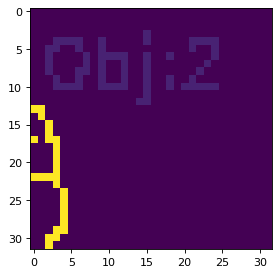

162


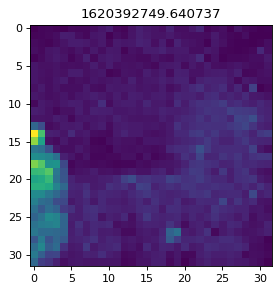

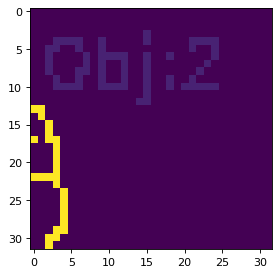

163


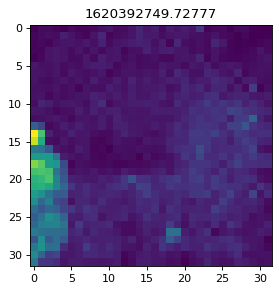

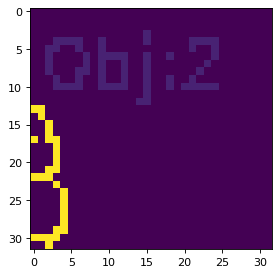

164


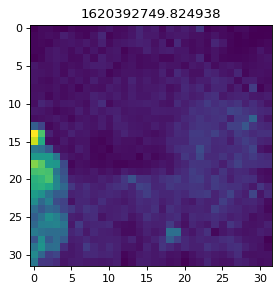

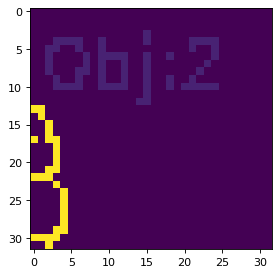

165


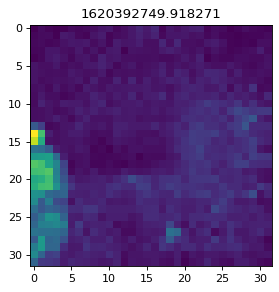

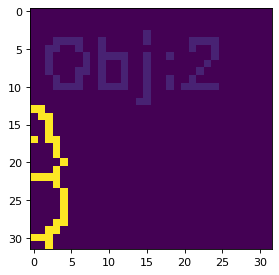

166


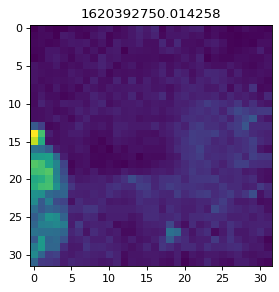

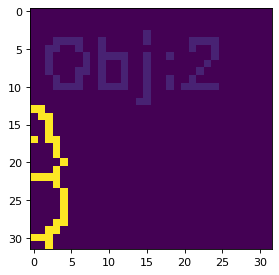

167


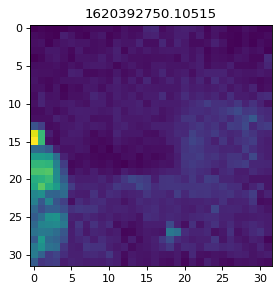

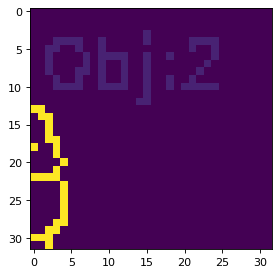

168


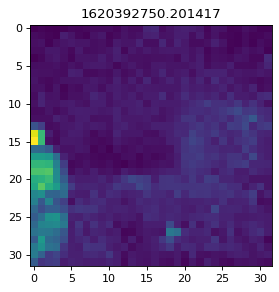

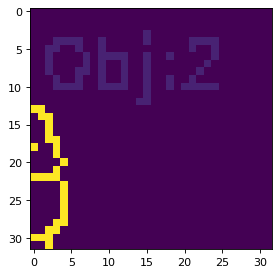

169


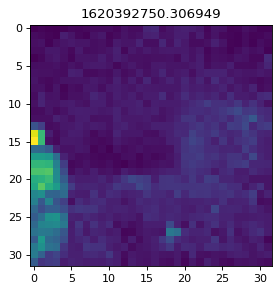

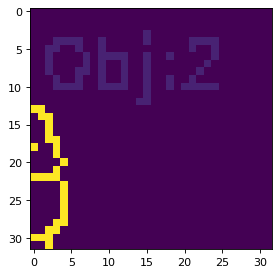

170


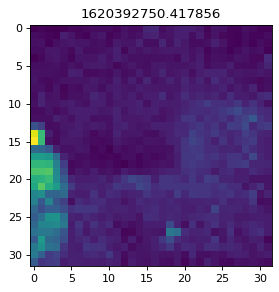

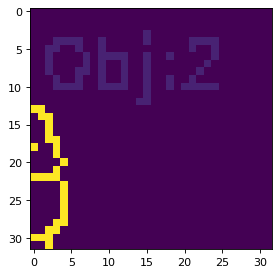

171


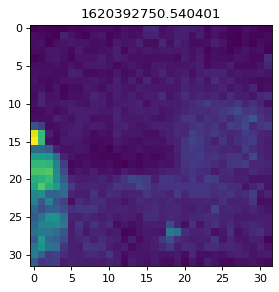

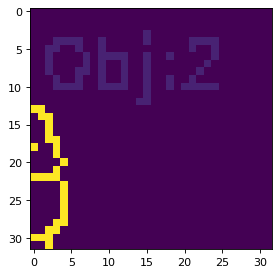

172


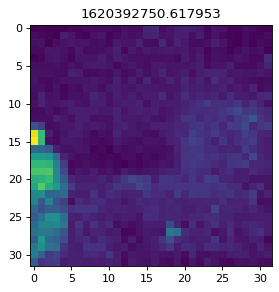

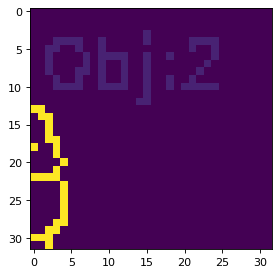

173


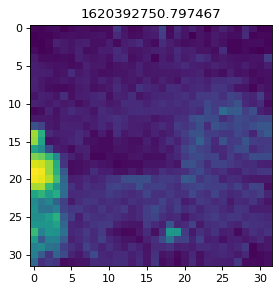

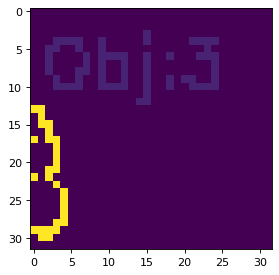

174


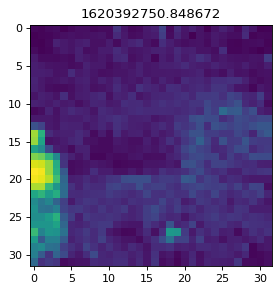

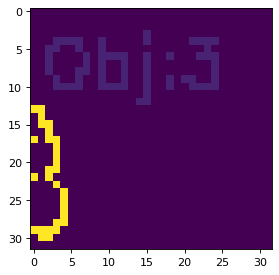

175


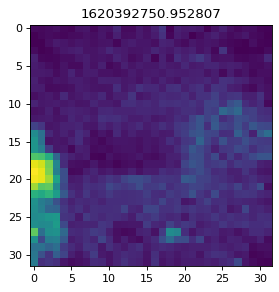

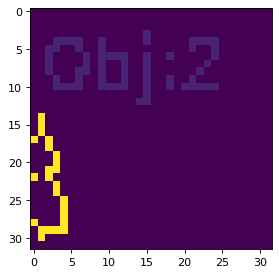

176


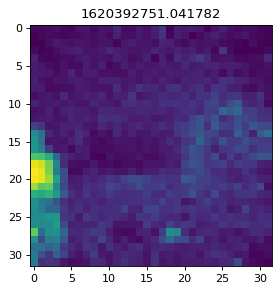

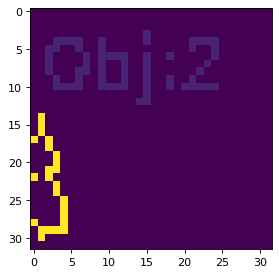

177


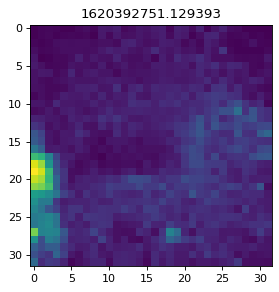

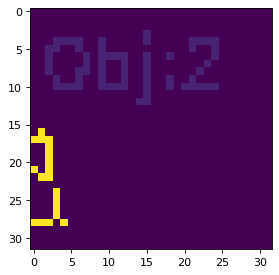

178


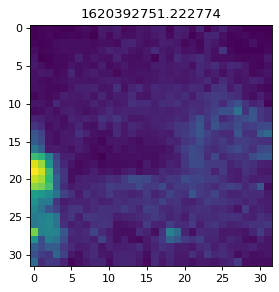

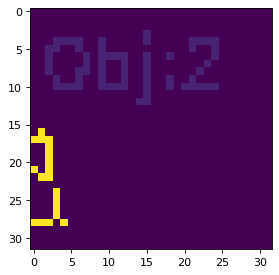

179


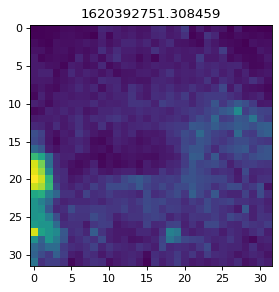

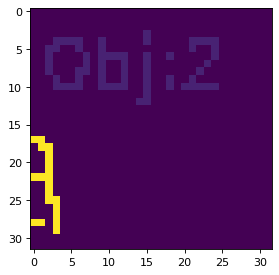

180


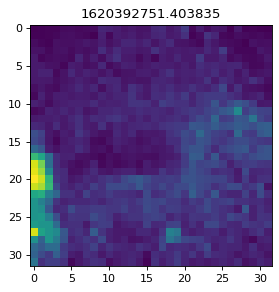

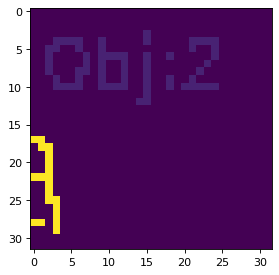

181


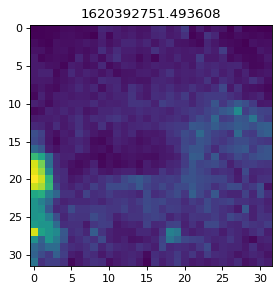

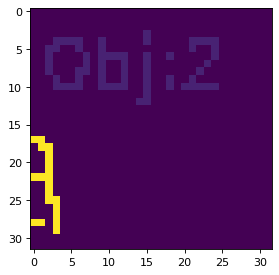

182


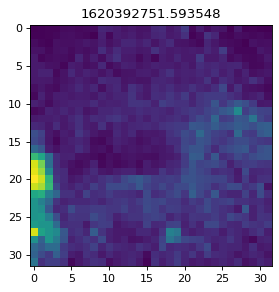

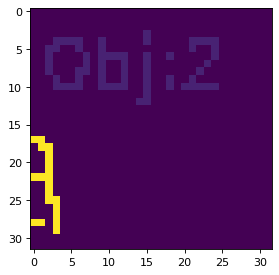

183


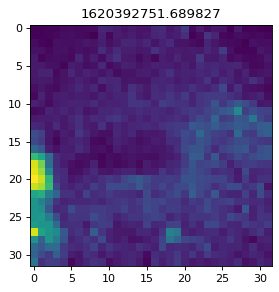

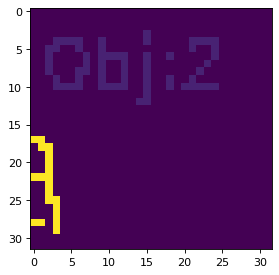

184


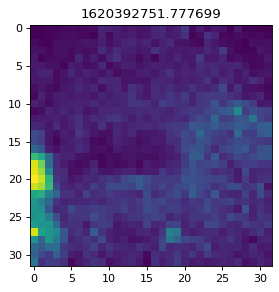

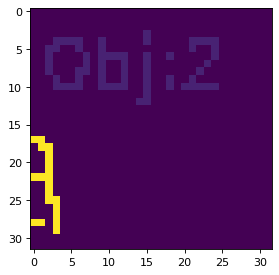

185


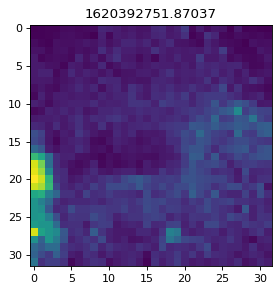

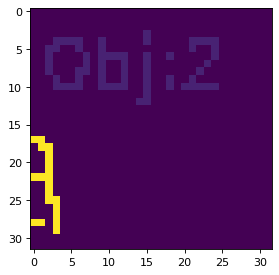

186


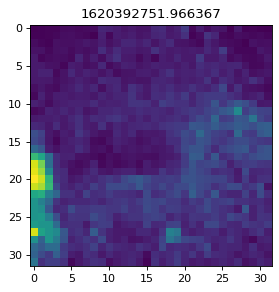

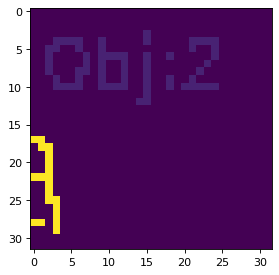

187


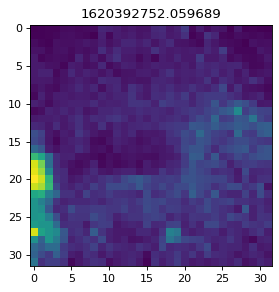

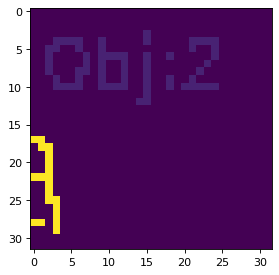

188


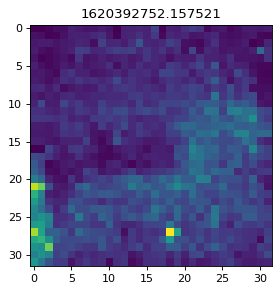

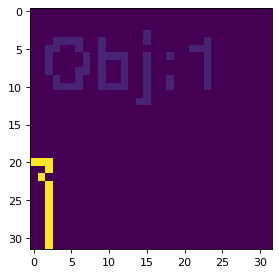

189


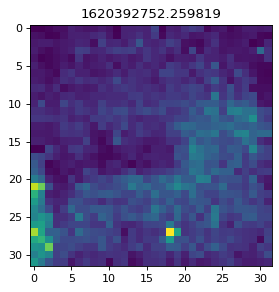

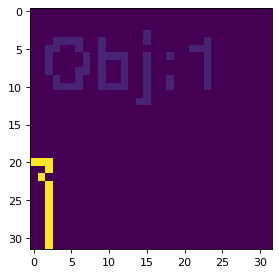

190


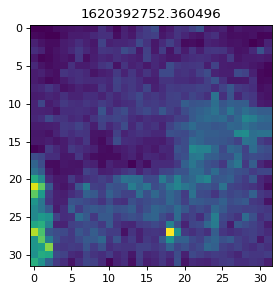

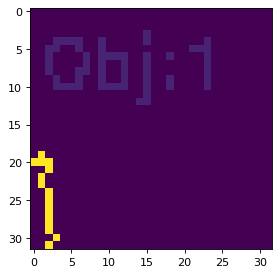

191


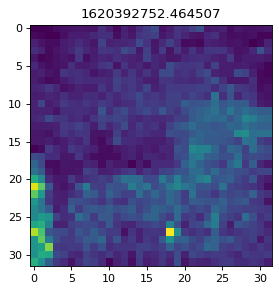

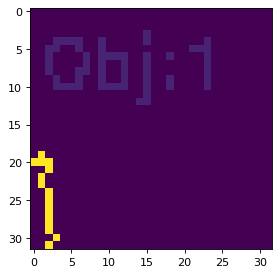

192


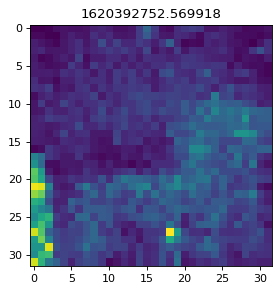

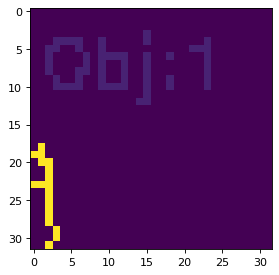

193


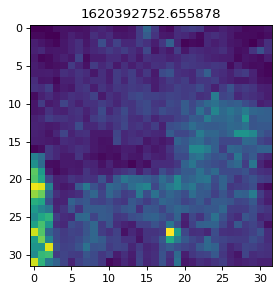

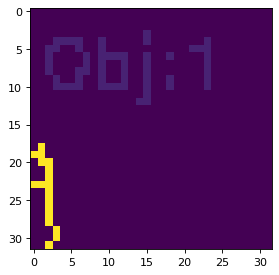

194


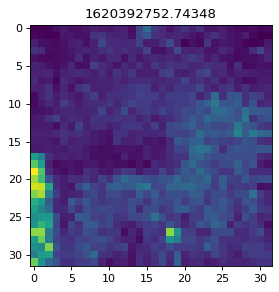

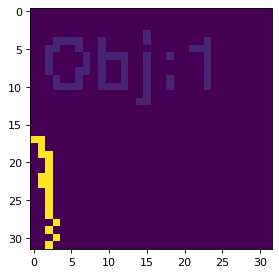

195


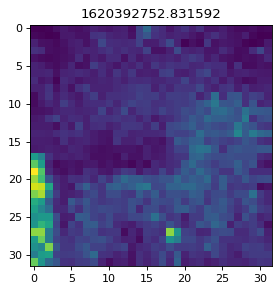

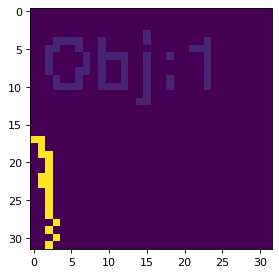

196


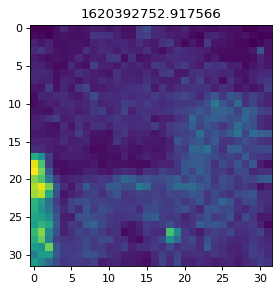

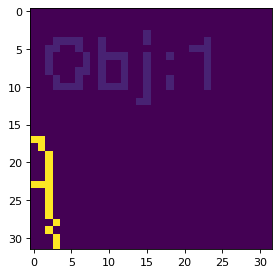

197


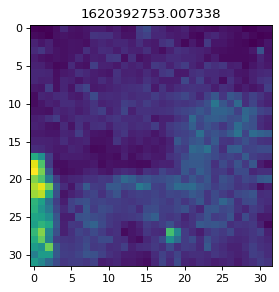

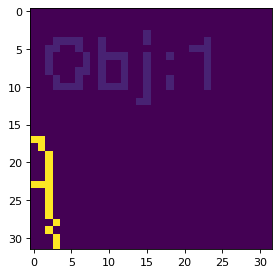

198


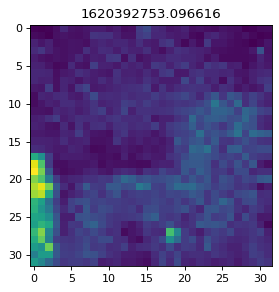

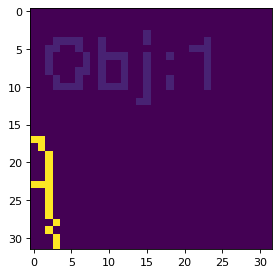

199


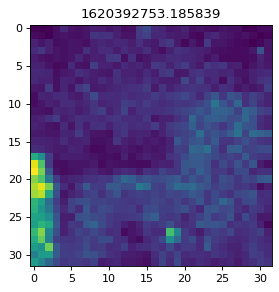

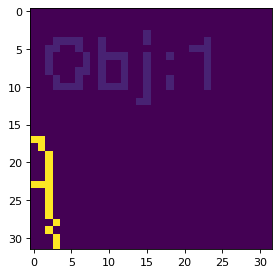

200


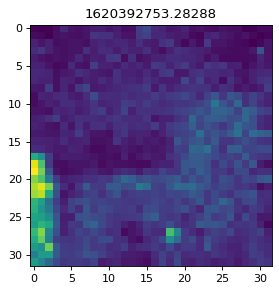

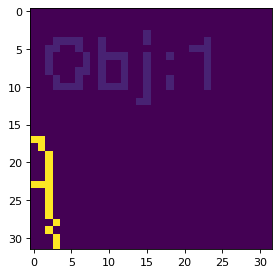

201


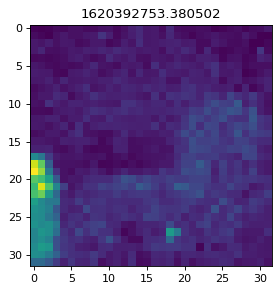

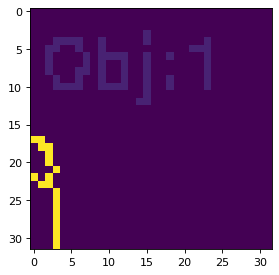

202


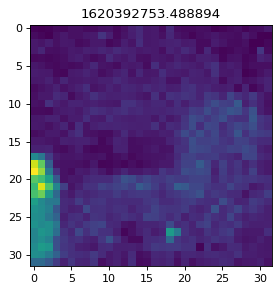

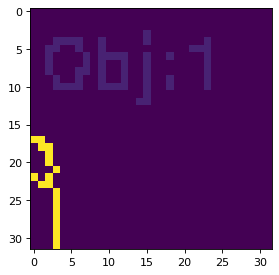

203


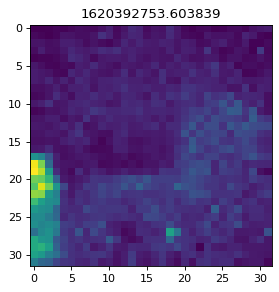

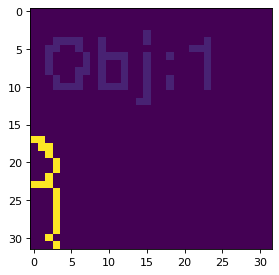

204


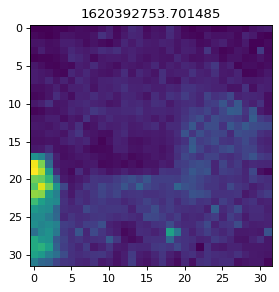

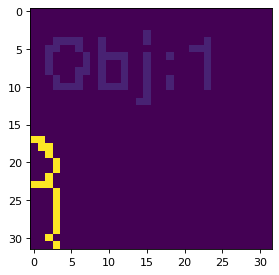

205


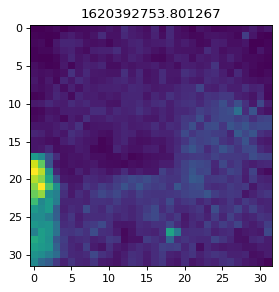

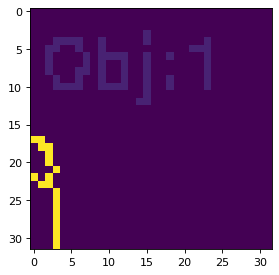

206


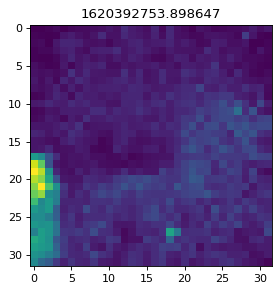

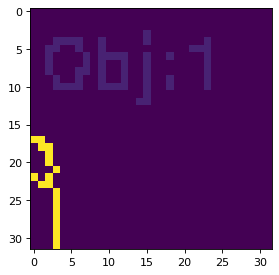

207


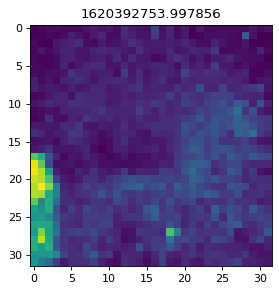

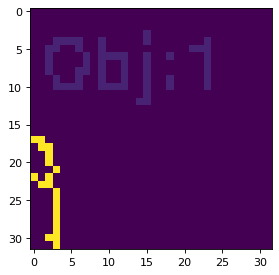

208


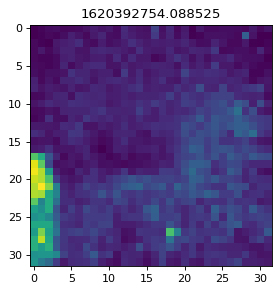

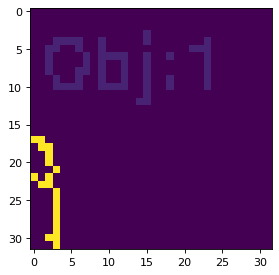

209


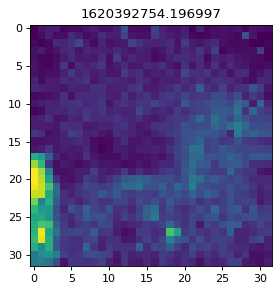

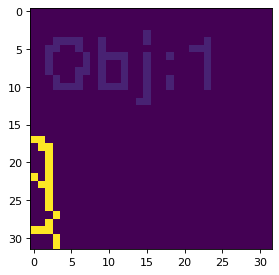

210


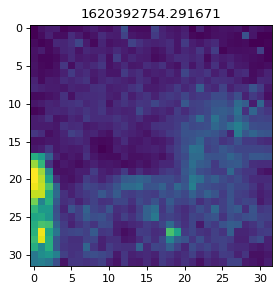

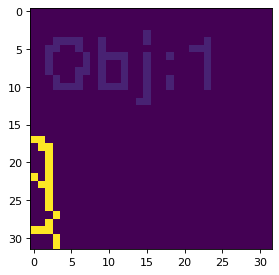

211


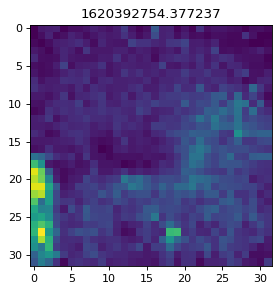

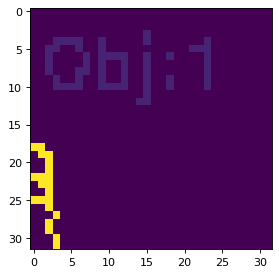

212


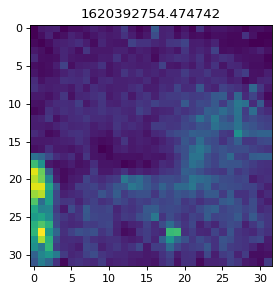

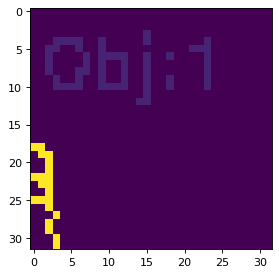

213


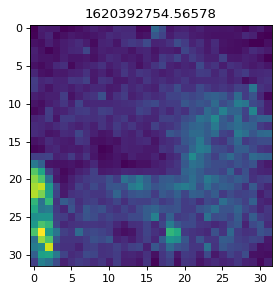

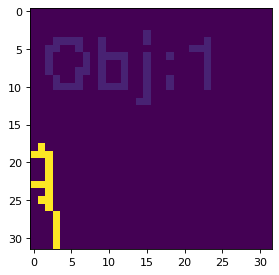

214


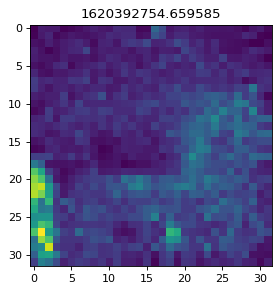

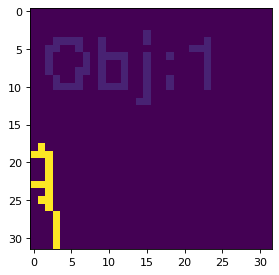

215


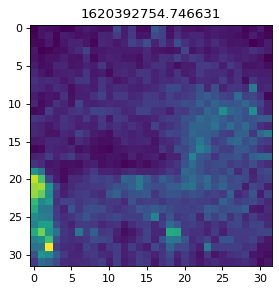

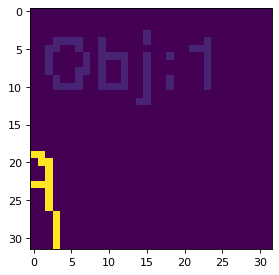

216


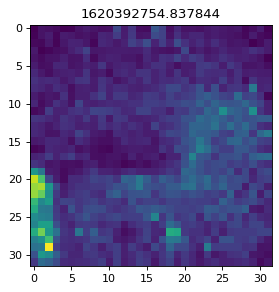

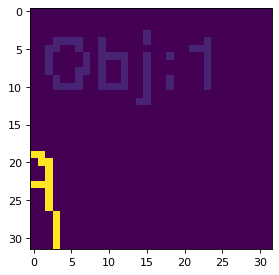

217


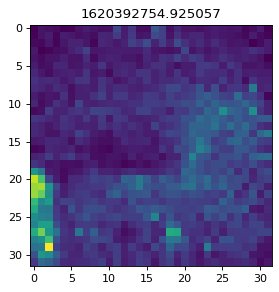

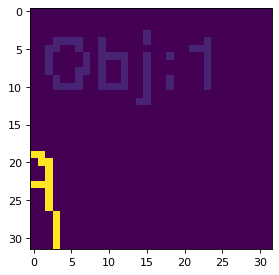

218


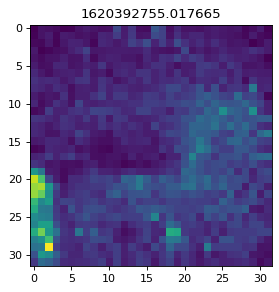

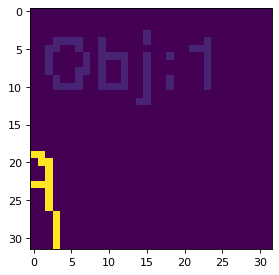

219


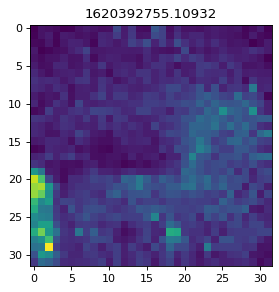

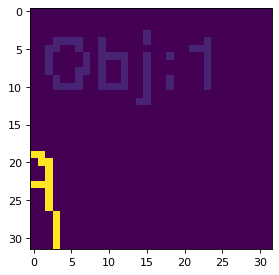

220


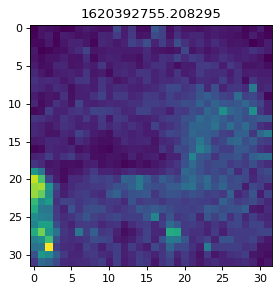

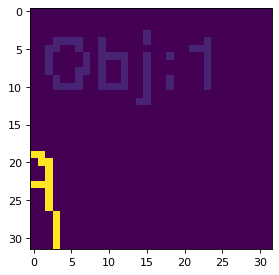

221


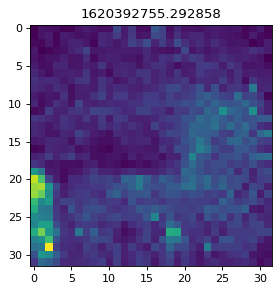

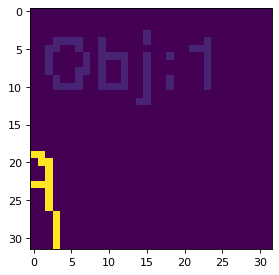

222


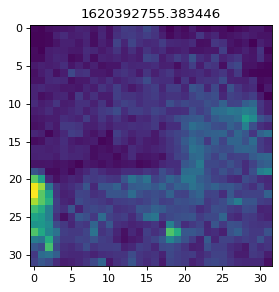

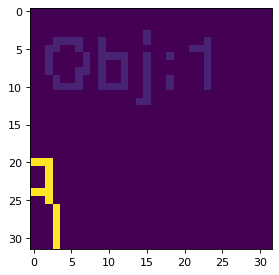

223


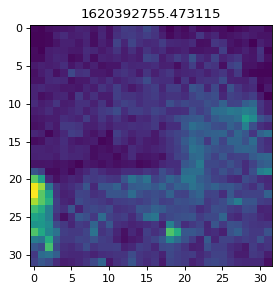

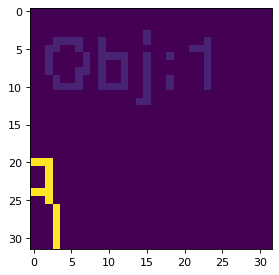

224


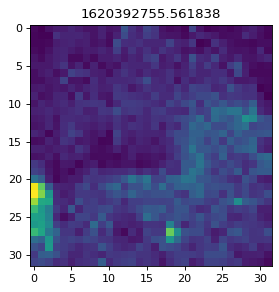

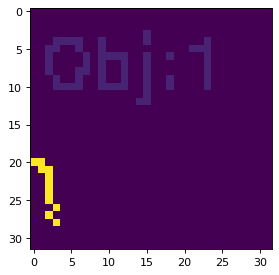

225


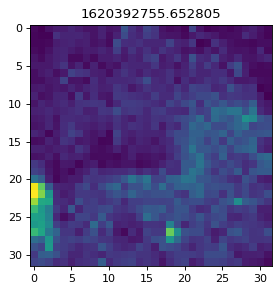

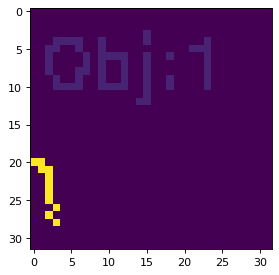

226


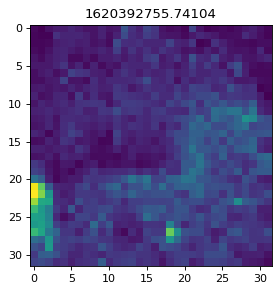

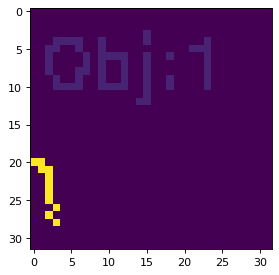

227


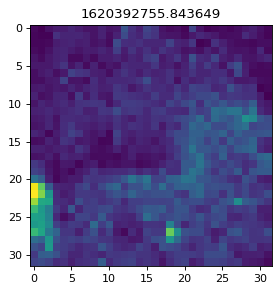

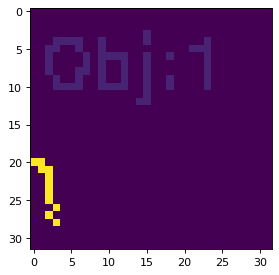

228


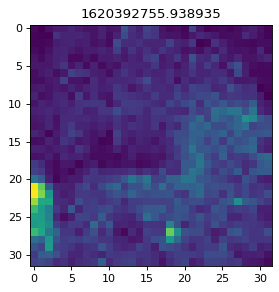

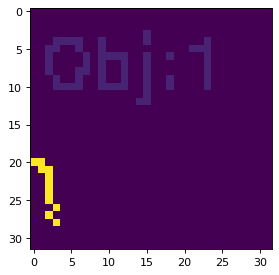

229


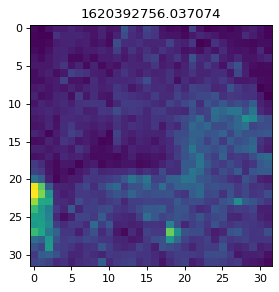

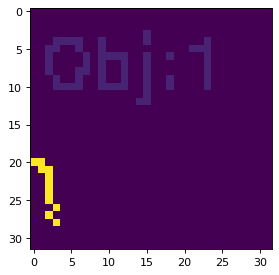

230


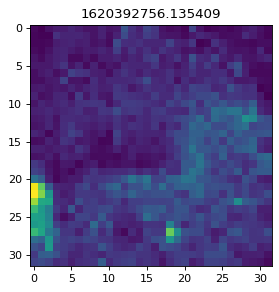

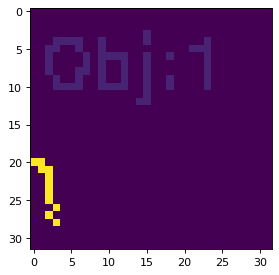

231


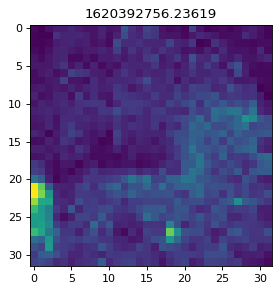

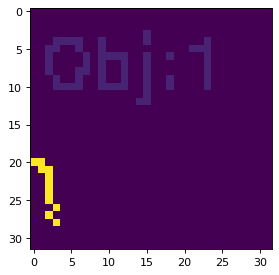

232


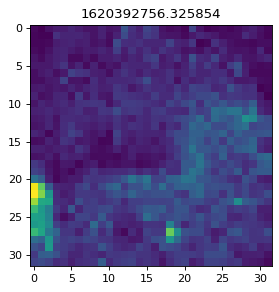

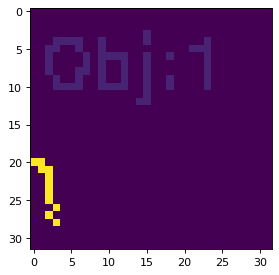

233


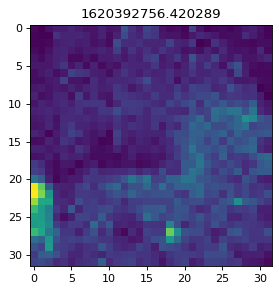

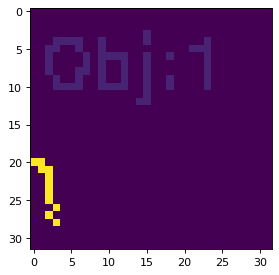

234


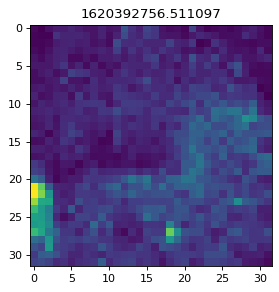

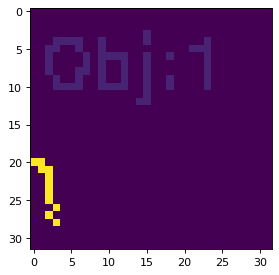

235


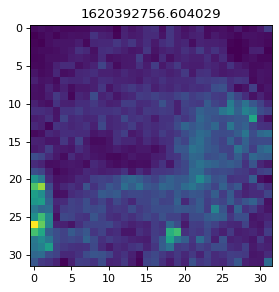

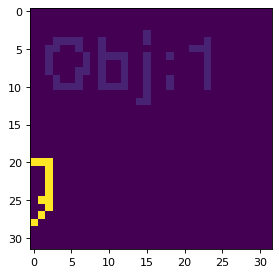

236


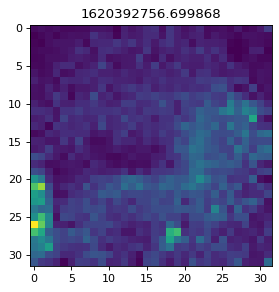

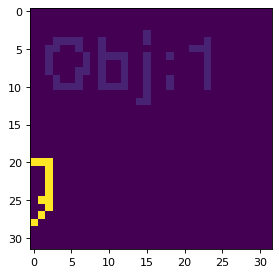

237


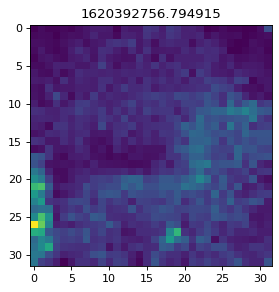

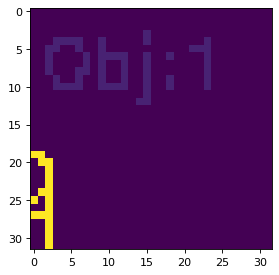

238


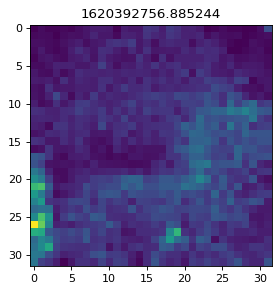

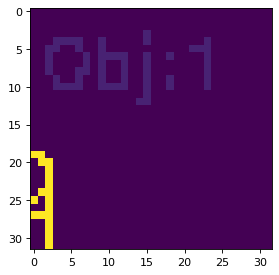

239


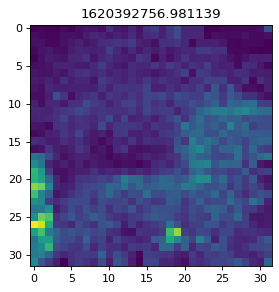

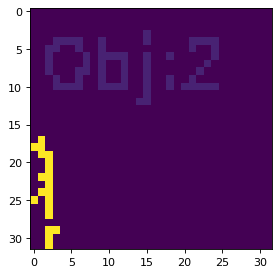

240


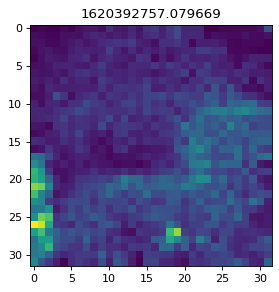

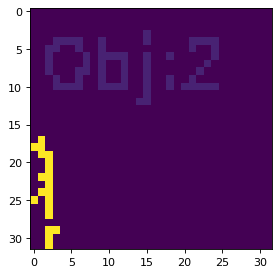

241


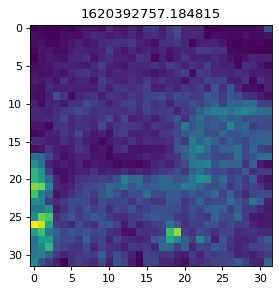

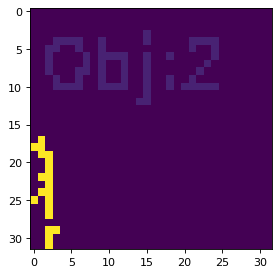

242


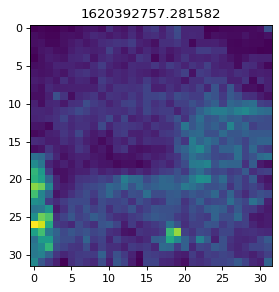

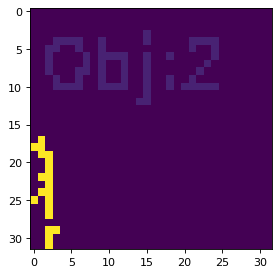

243


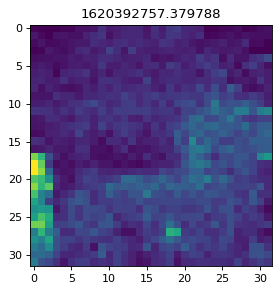

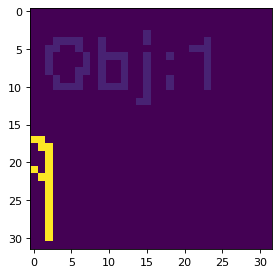

244


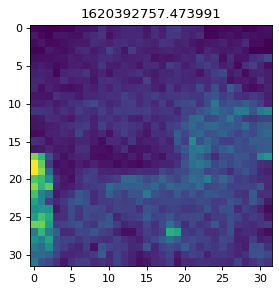

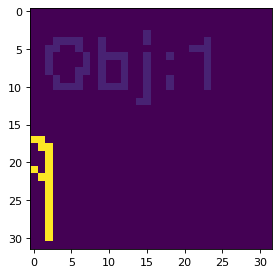

245


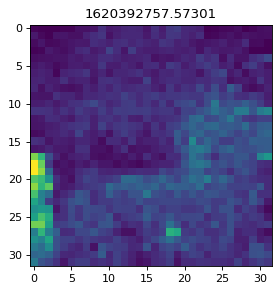

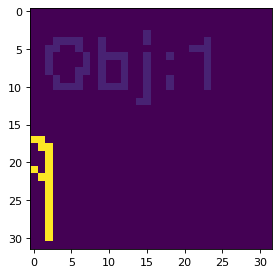

246


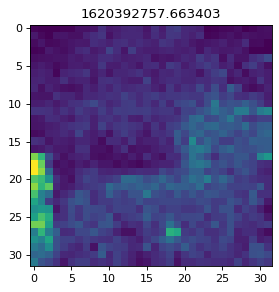

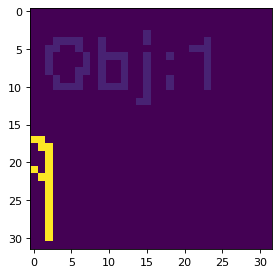

247


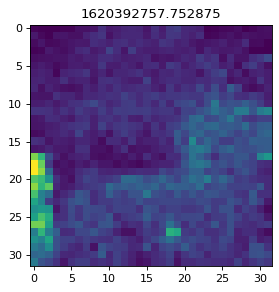

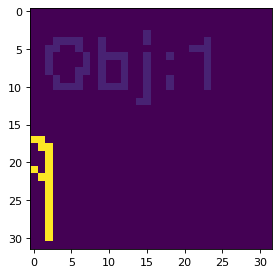

248


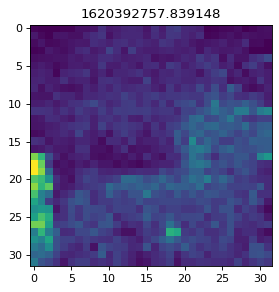

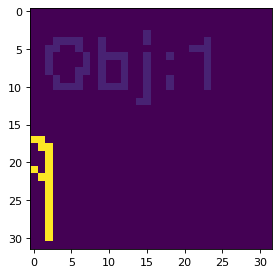

249


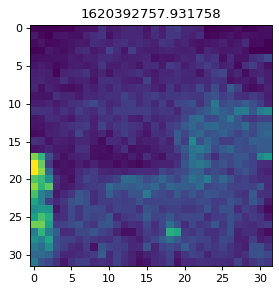

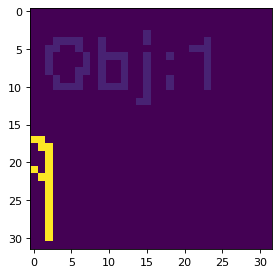

250


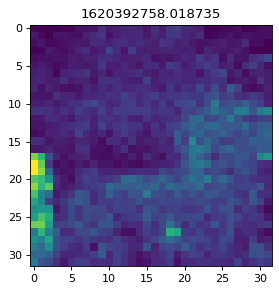

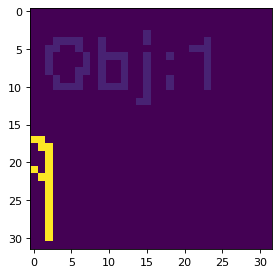

251


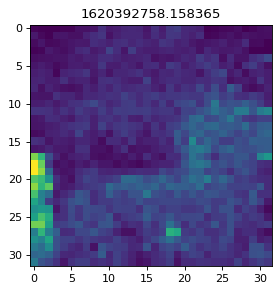

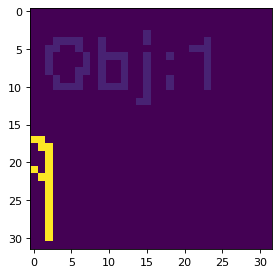

252


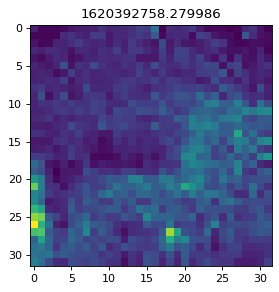

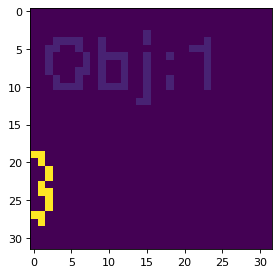

253


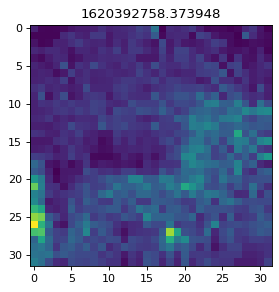

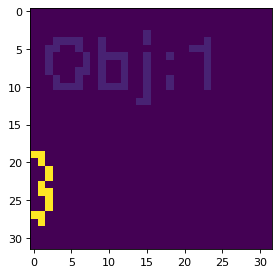

254


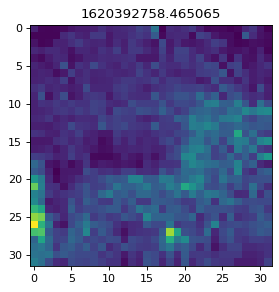

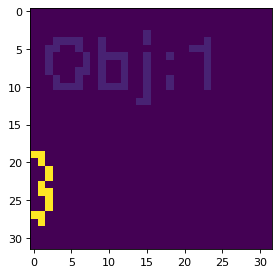

255


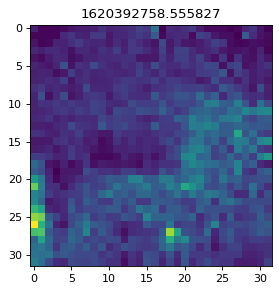

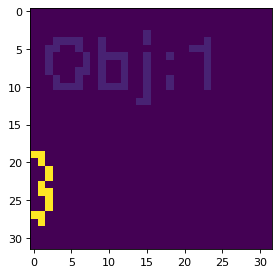

256


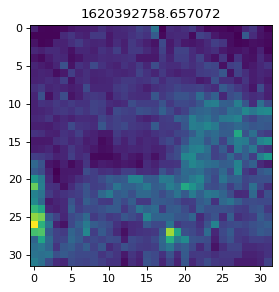

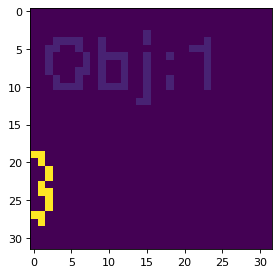

257


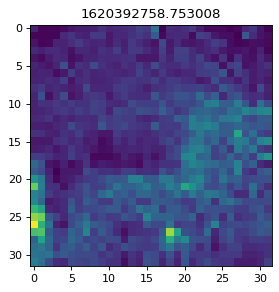

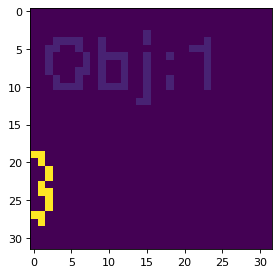

258


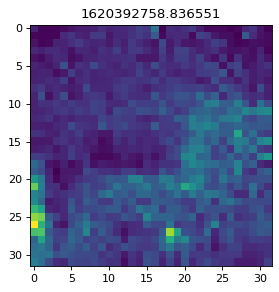

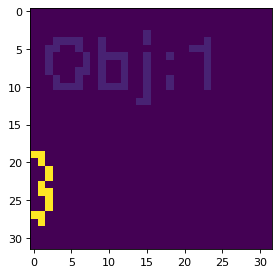

259


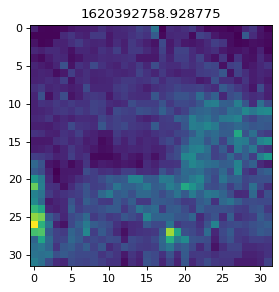

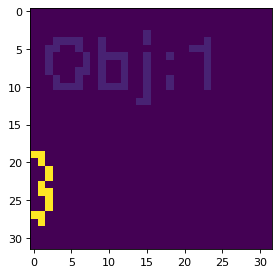

260


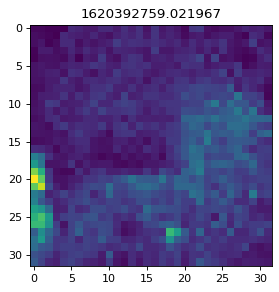

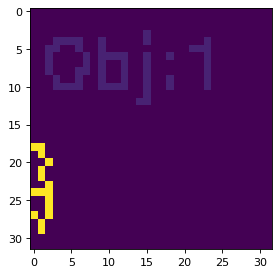

261


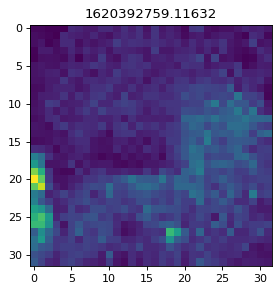

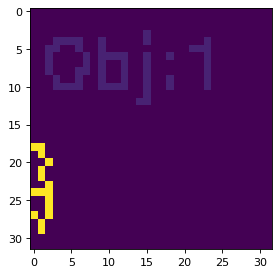

262


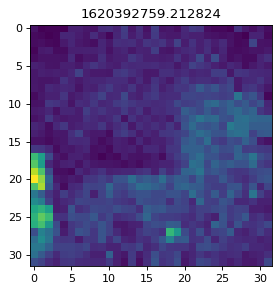

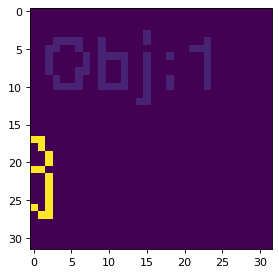

263


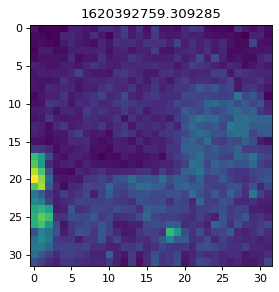

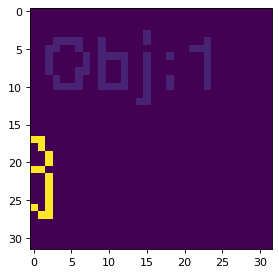

264


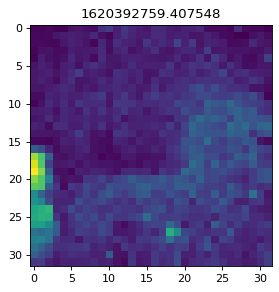

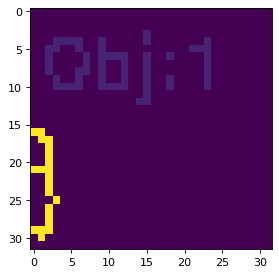

265


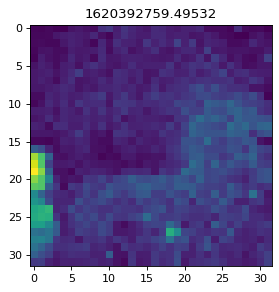

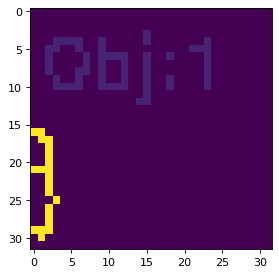

266


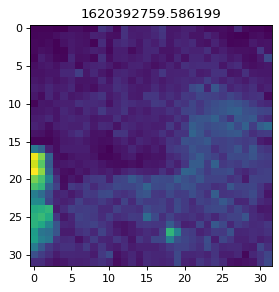

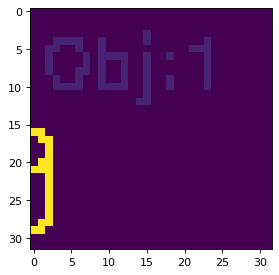

267


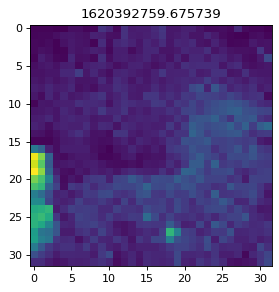

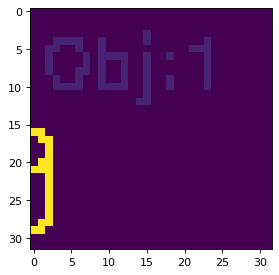

268


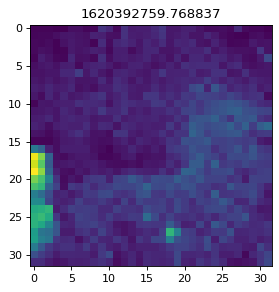

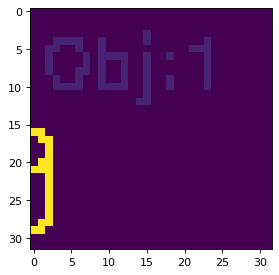

269


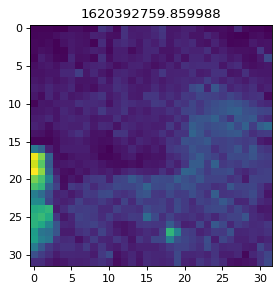

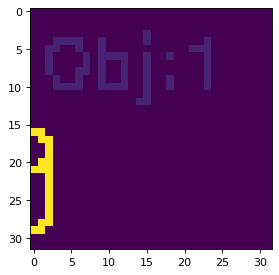

270


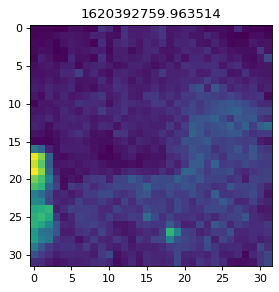

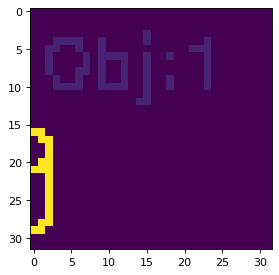

271


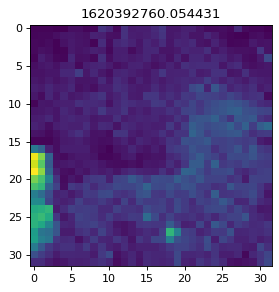

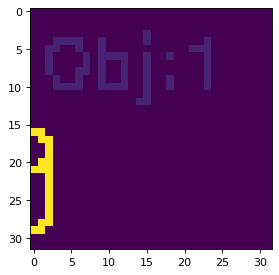

272


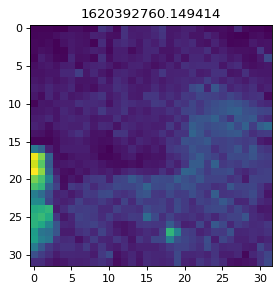

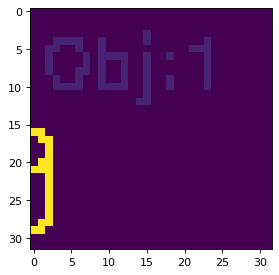

273


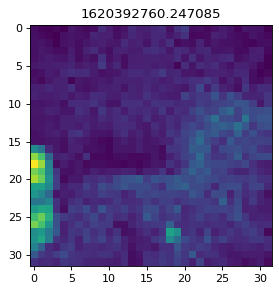

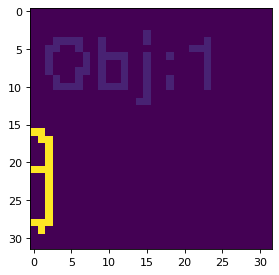

274


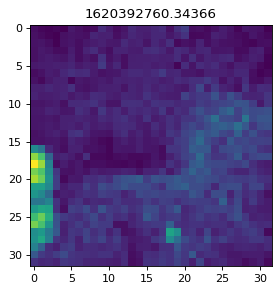

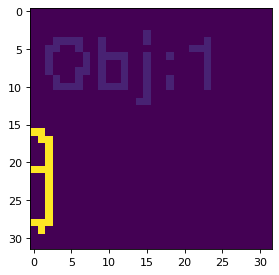

275


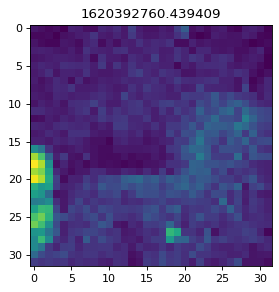

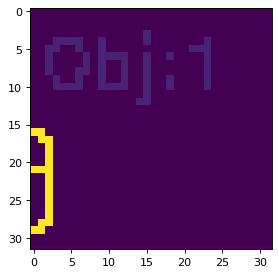

276


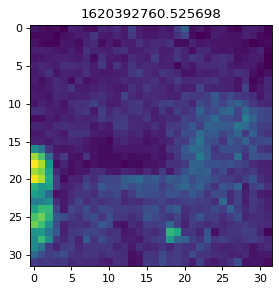

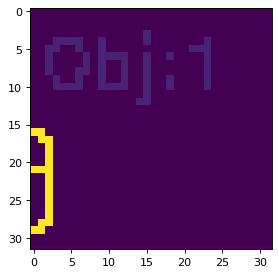

277


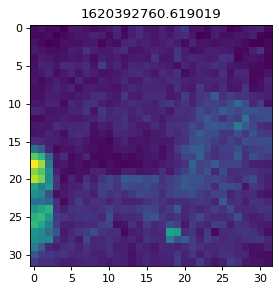

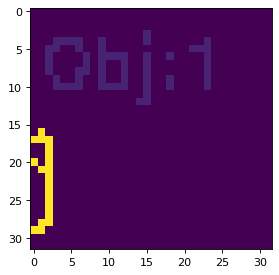

278


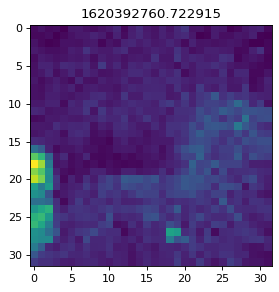

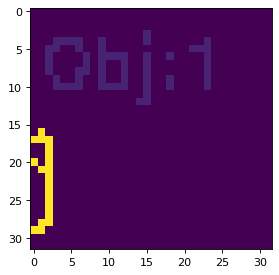

279


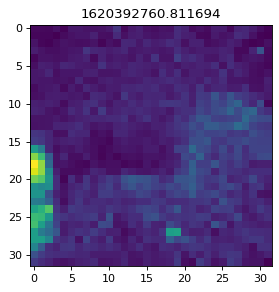

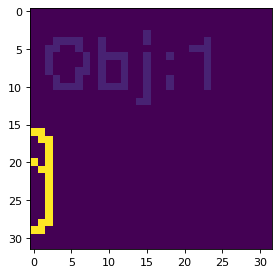

280


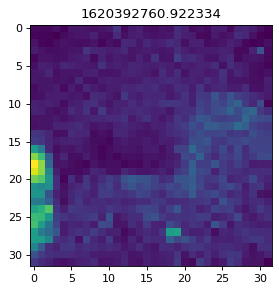

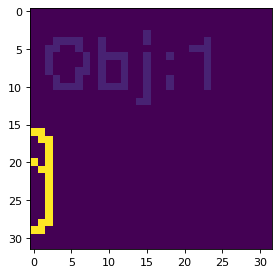

281


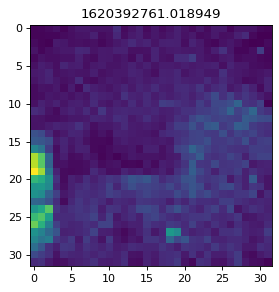

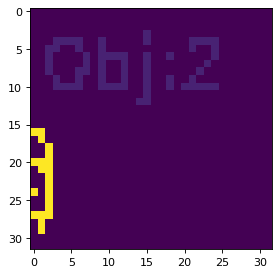

282


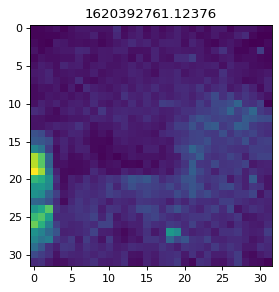

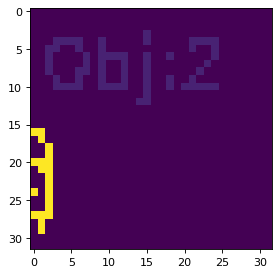

283


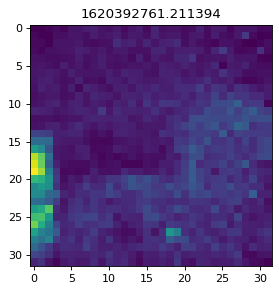

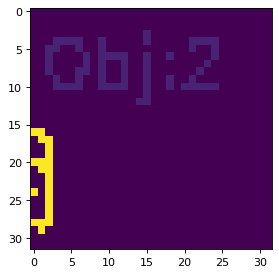

284


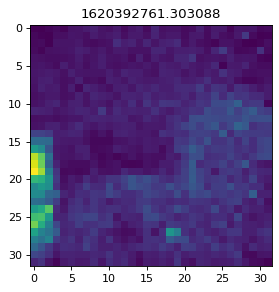

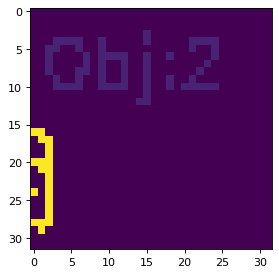

285


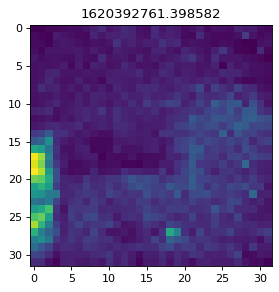

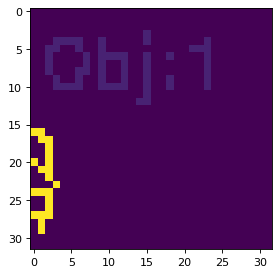

286


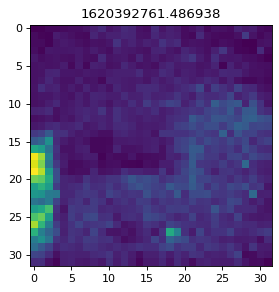

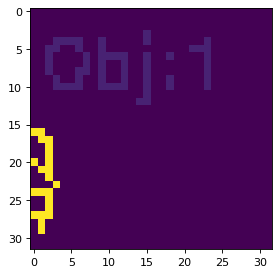

287


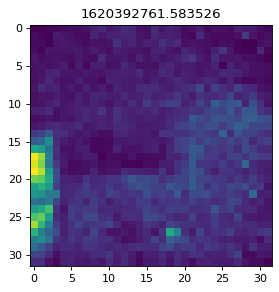

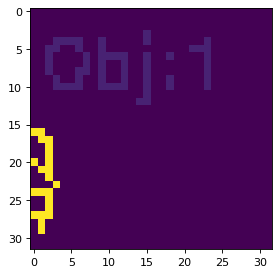

288


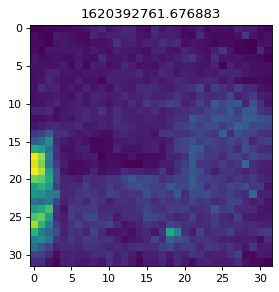

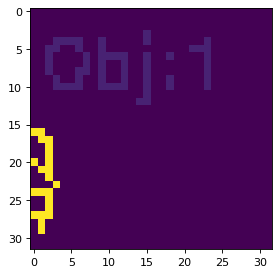

289


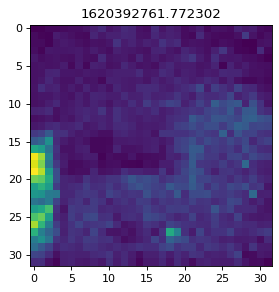

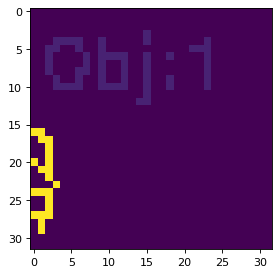

290


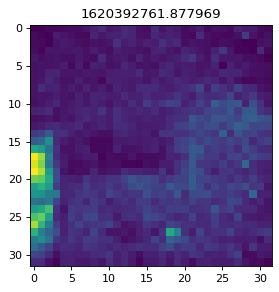

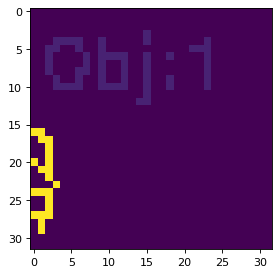

291


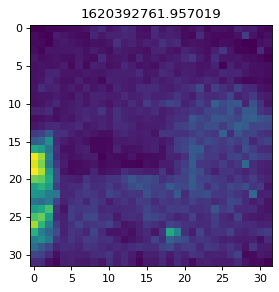

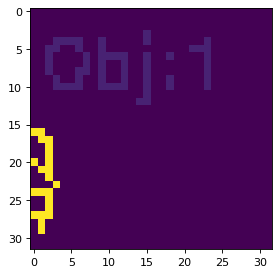

292


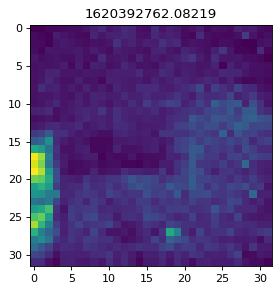

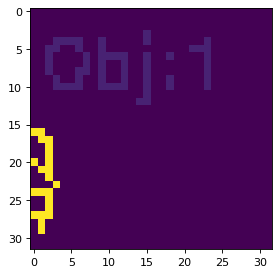

293


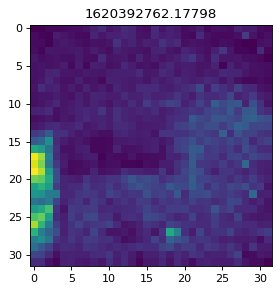

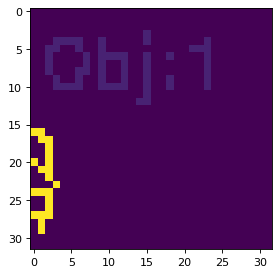

294


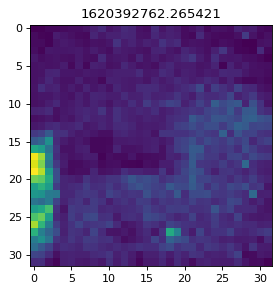

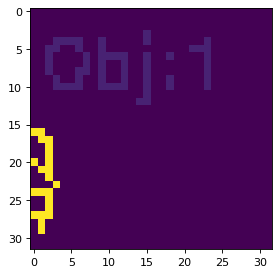

295


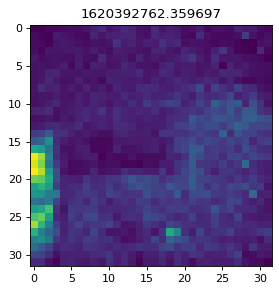

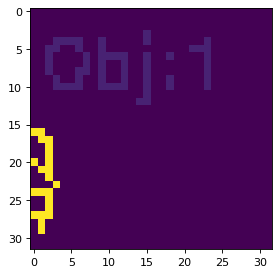

296


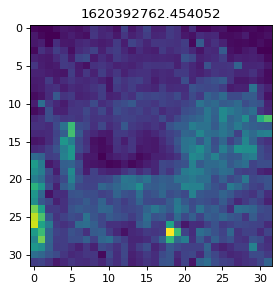

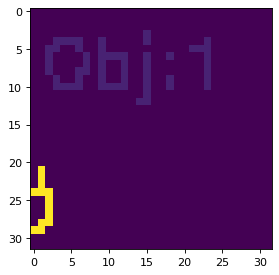

297


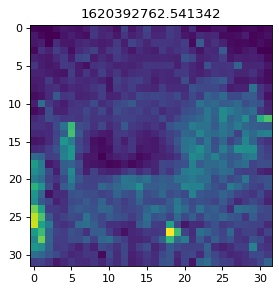

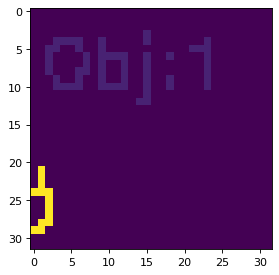

298


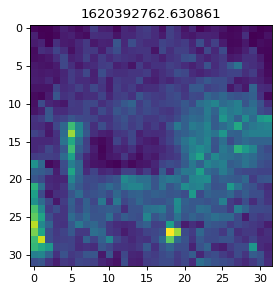

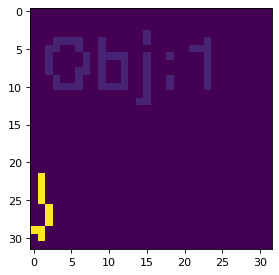

299


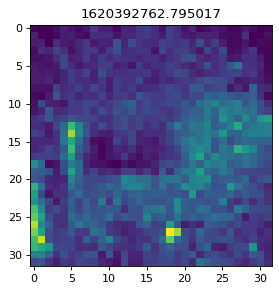

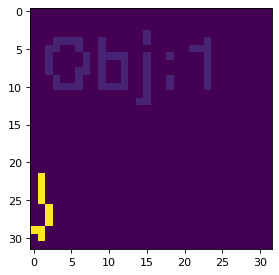

300


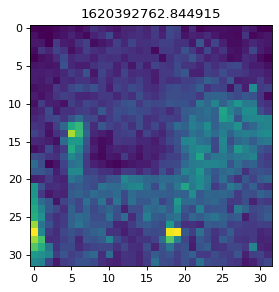

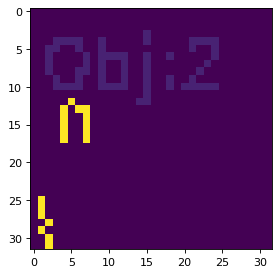

301


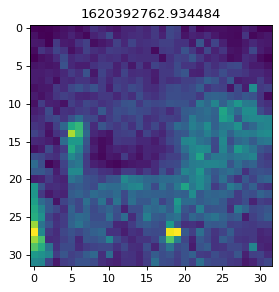

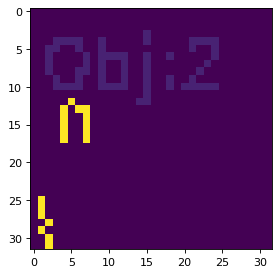

302


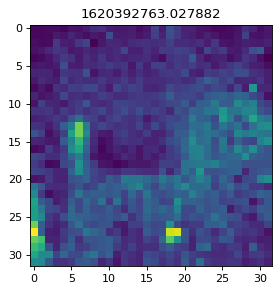

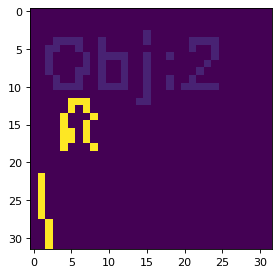

303


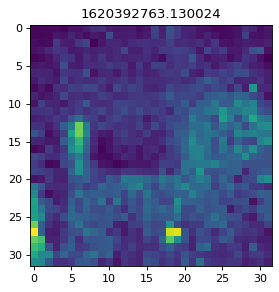

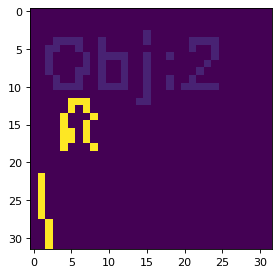

304


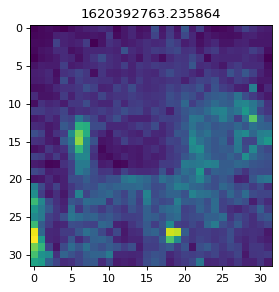

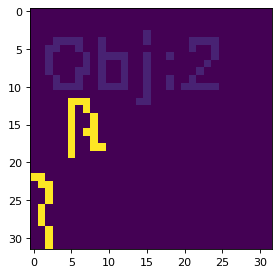

305


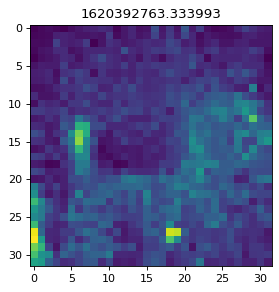

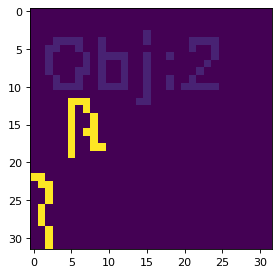

306


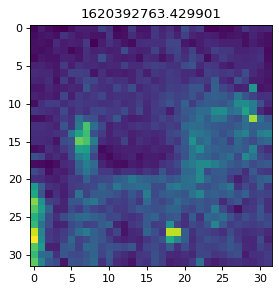

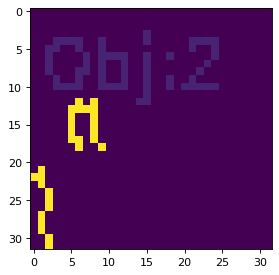

307


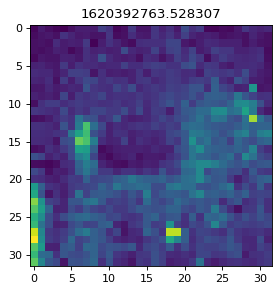

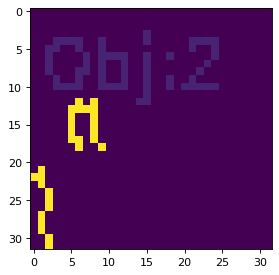

308


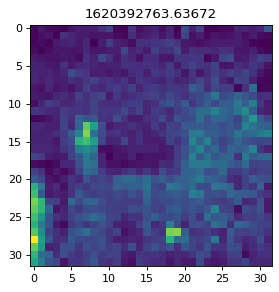

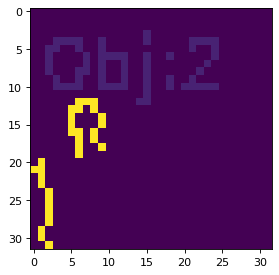

309


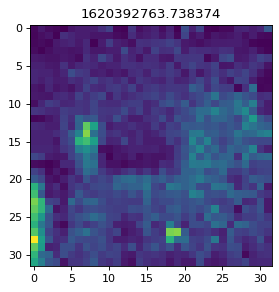

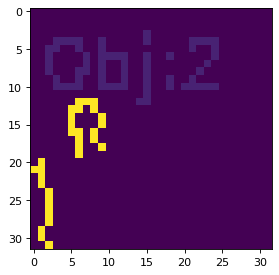

310


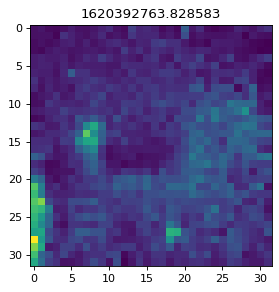

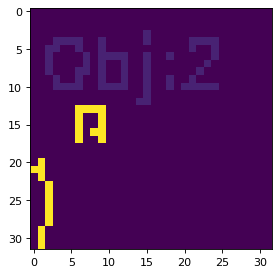

311


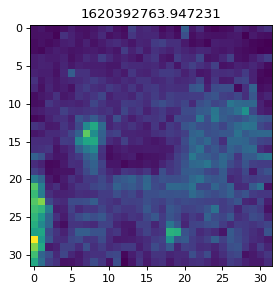

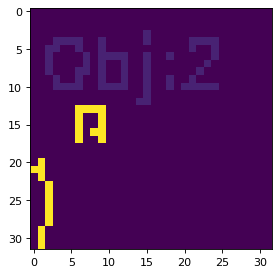

312


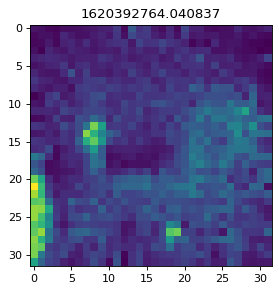

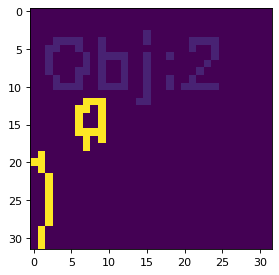

313


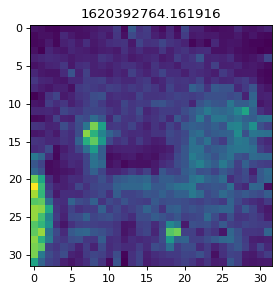

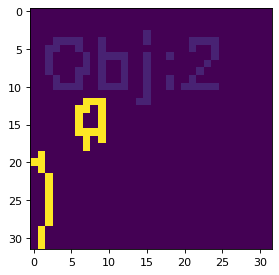

314


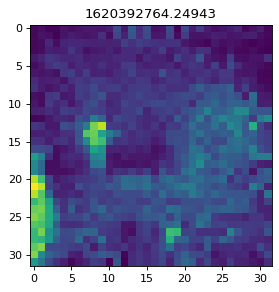

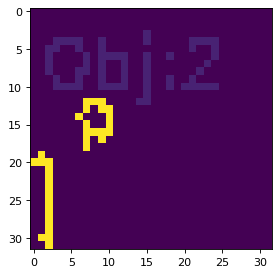

315


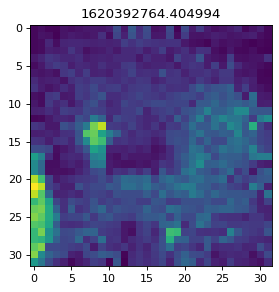

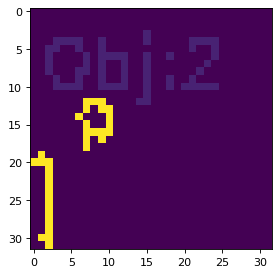

316


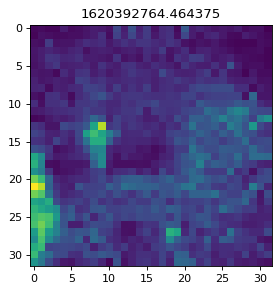

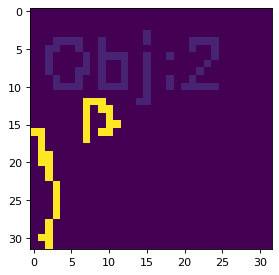

317


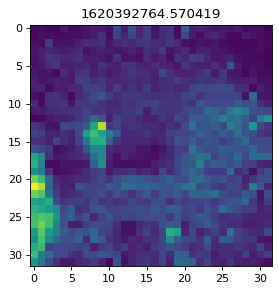

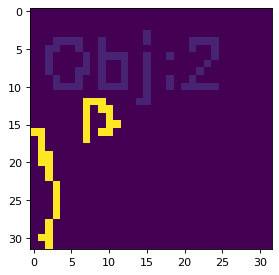

318


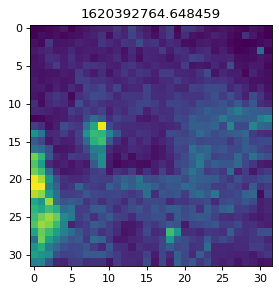

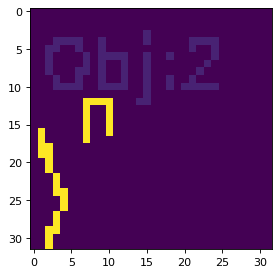

319


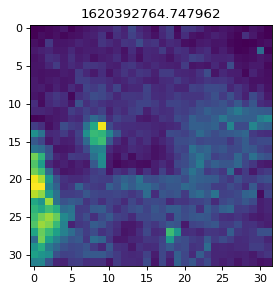

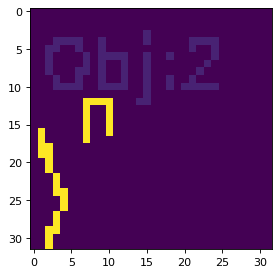

320


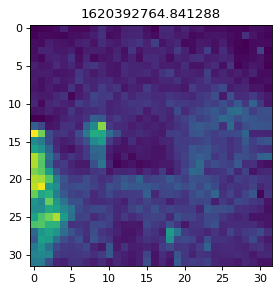

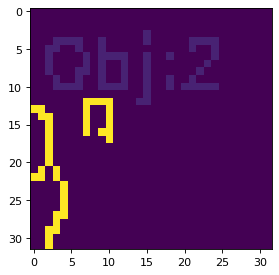

321


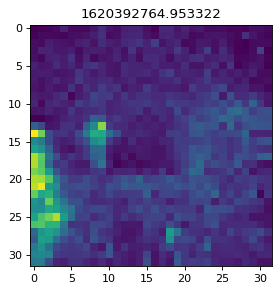

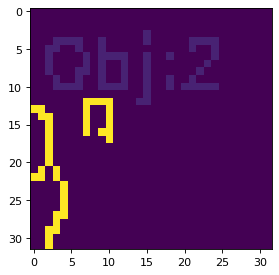

322


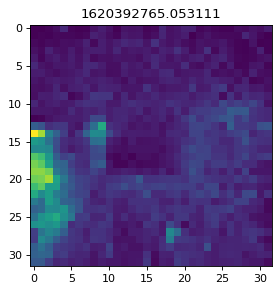

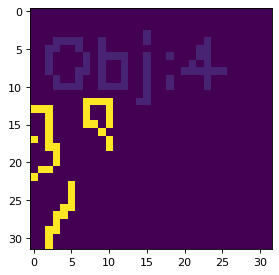

323


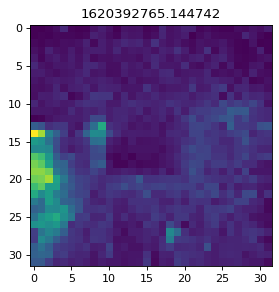

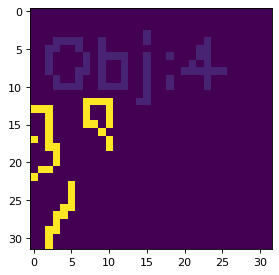

324


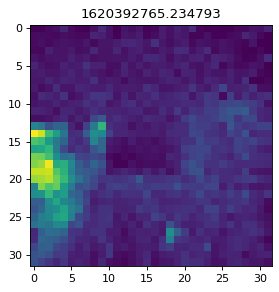

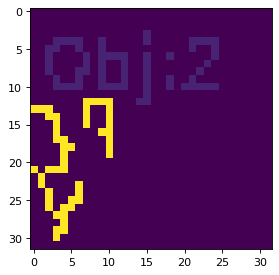

325


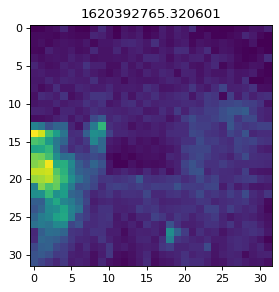

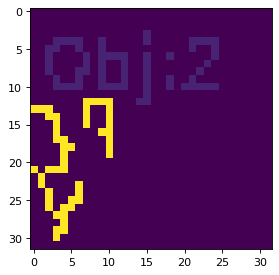

326


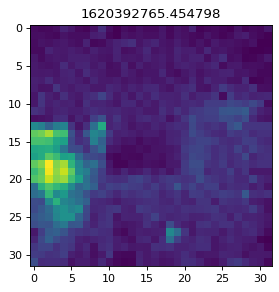

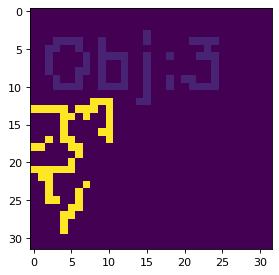

327


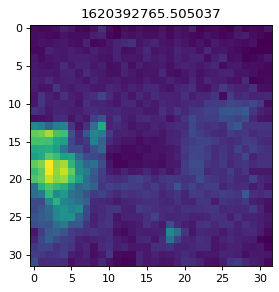

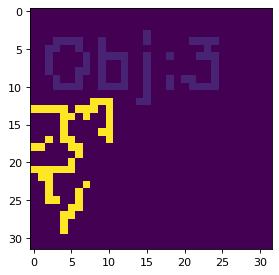

328


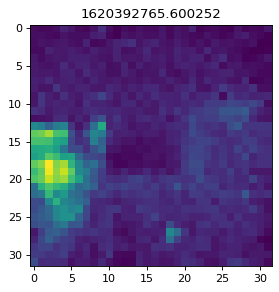

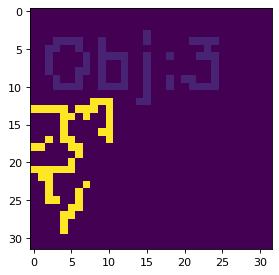

329


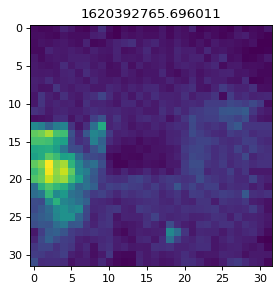

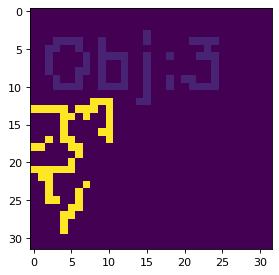

330


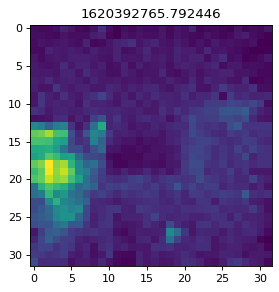

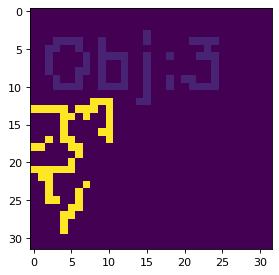

331


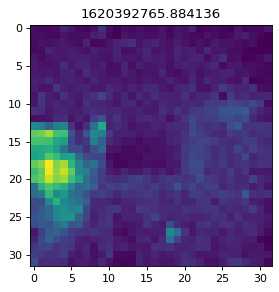

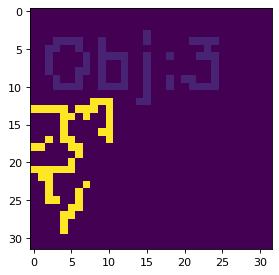

332


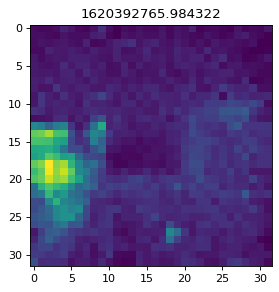

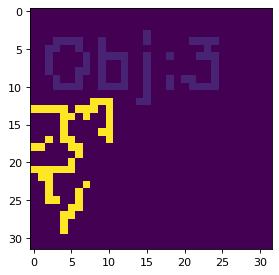

333


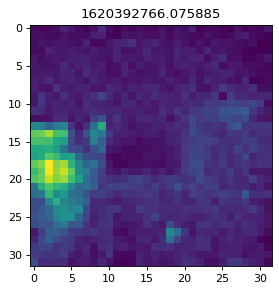

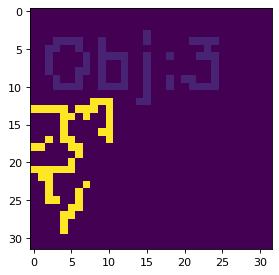

334


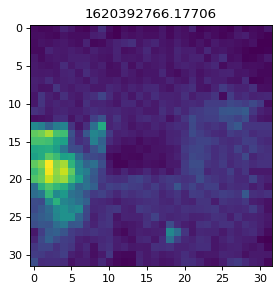

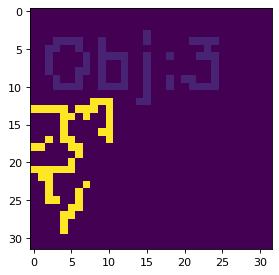

335


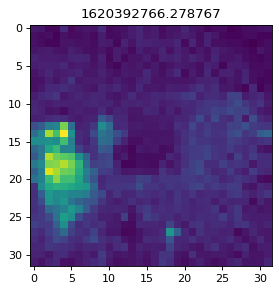

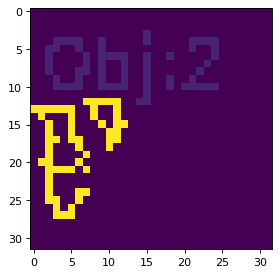

336


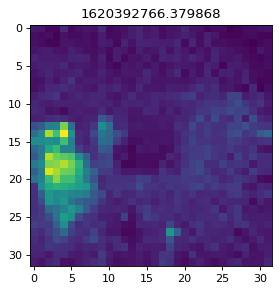

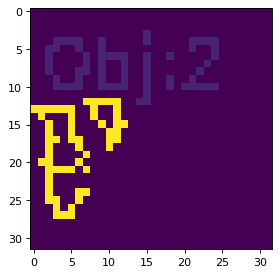

337


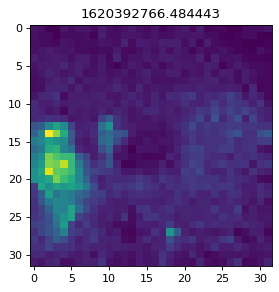

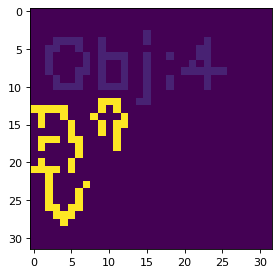

338


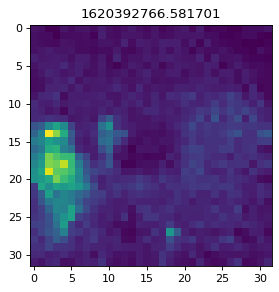

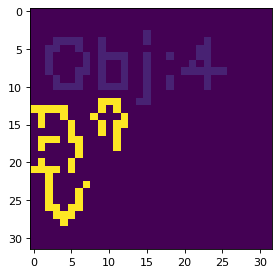

339


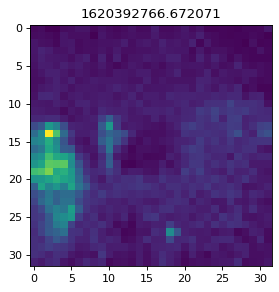

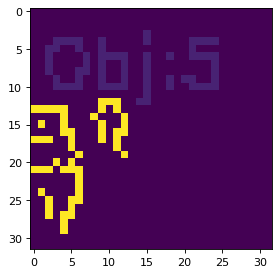

340


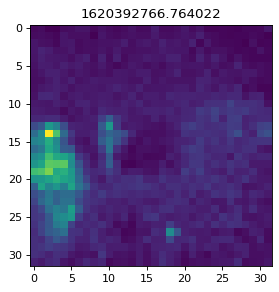

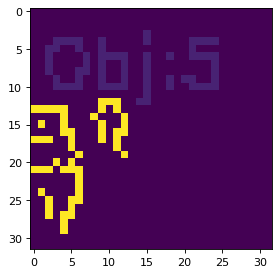

341


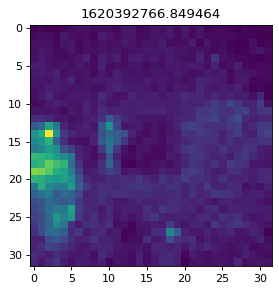

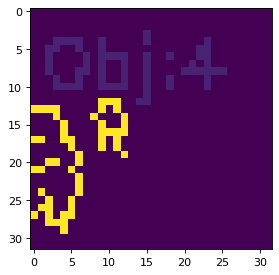

342


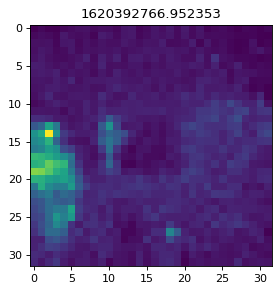

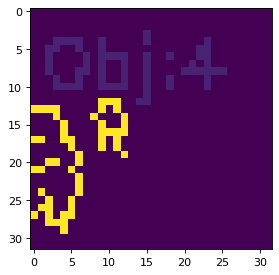

343


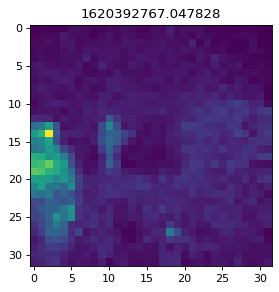

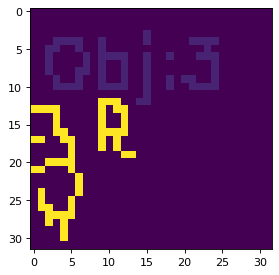

344


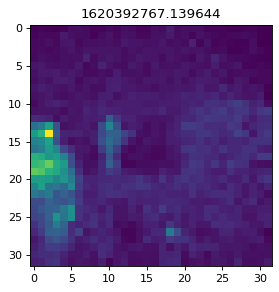

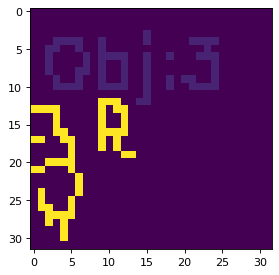

345


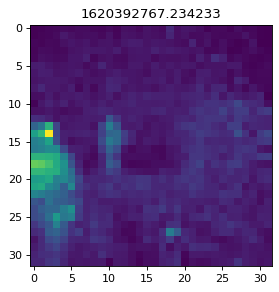

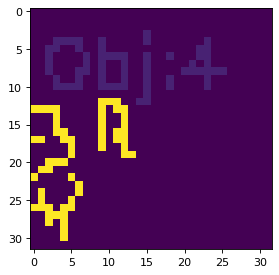

346


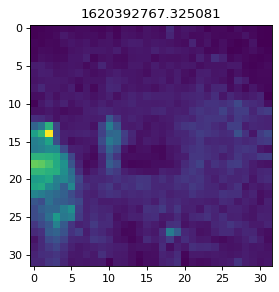

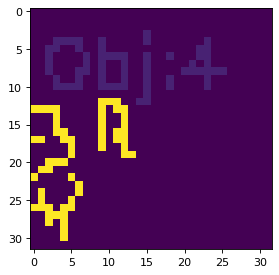

347


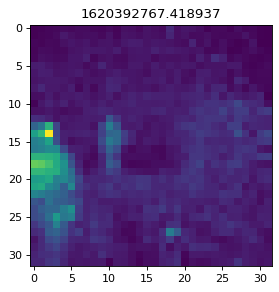

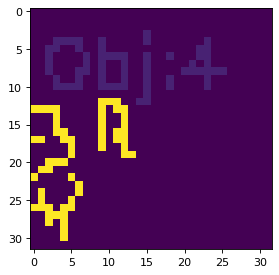

348


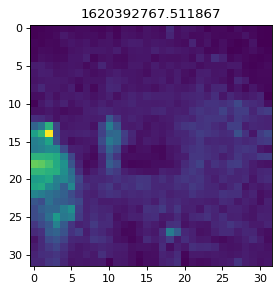

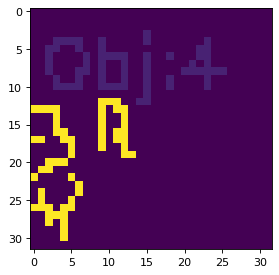

349


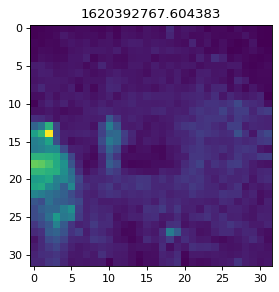

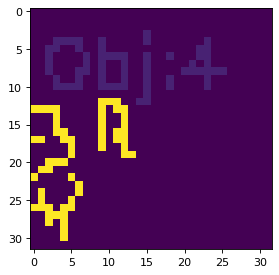

350


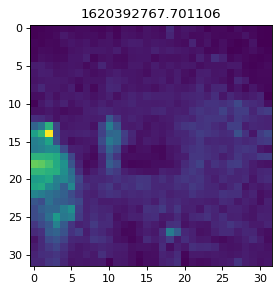

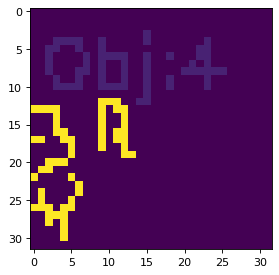

351


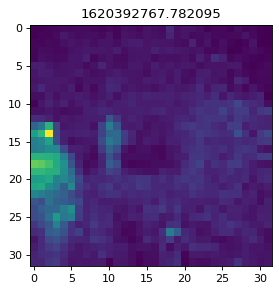

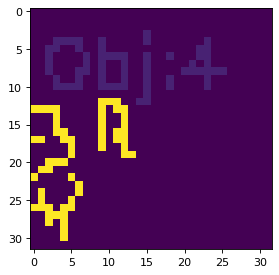

352


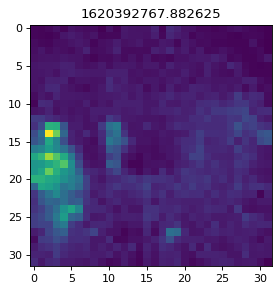

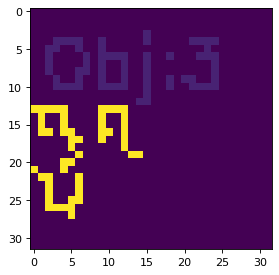

353


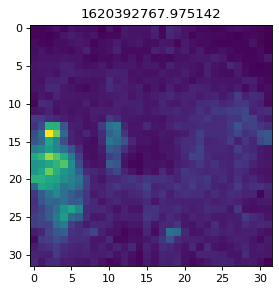

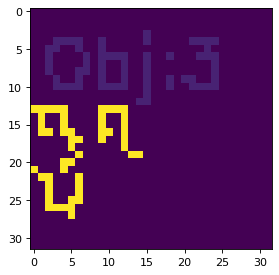

354


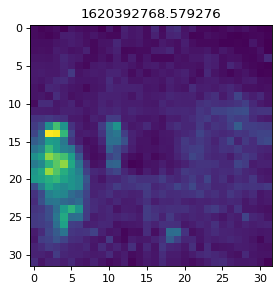

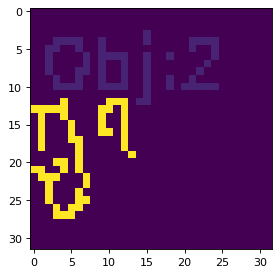

355


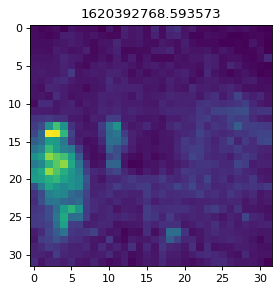

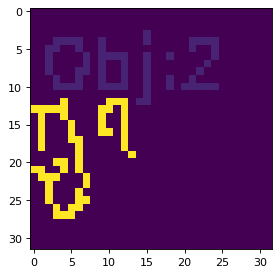

356


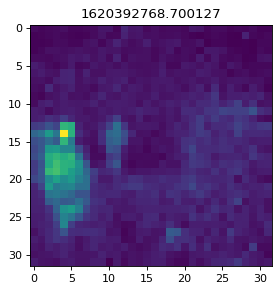

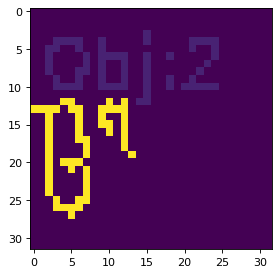

357


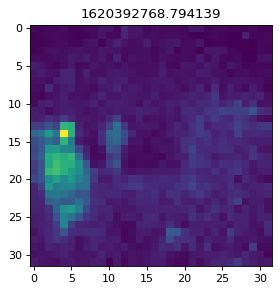

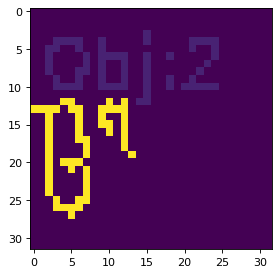

358


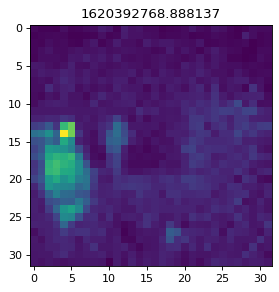

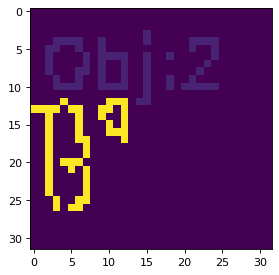

359


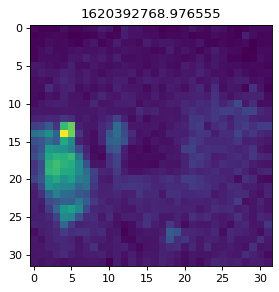

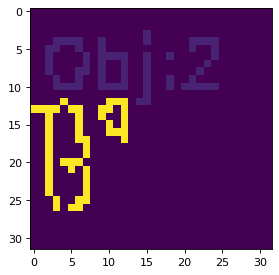

360


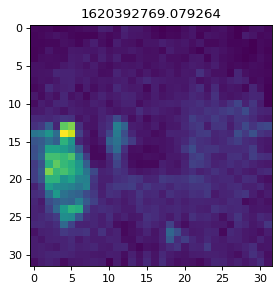

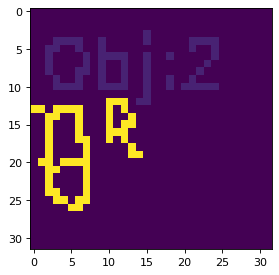

361


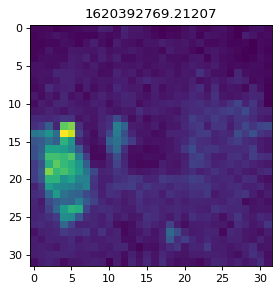

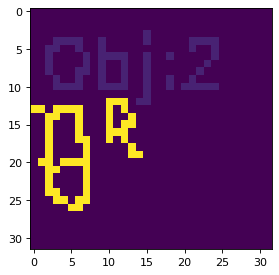

362


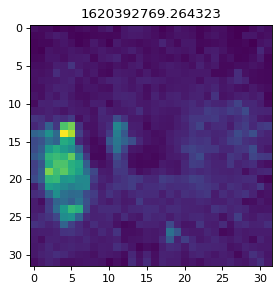

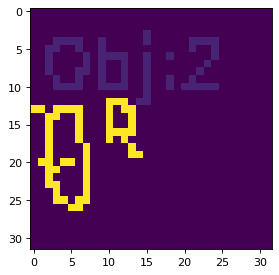

363


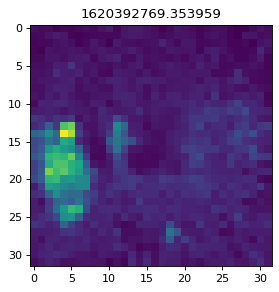

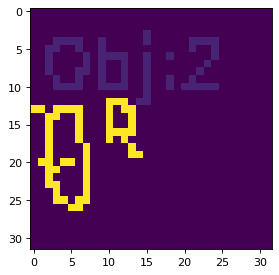

364


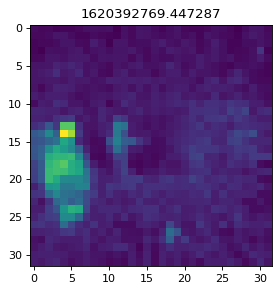

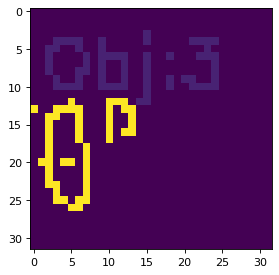

365


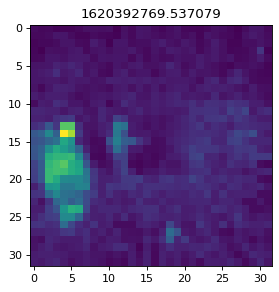

KeyboardInterrupt: ignored

<Figure size 480x320 with 0 Axes>

In [22]:
new_file = open("20210507_1605_3078.txt", "w")

plt.rcParams['figure.dpi'] = 80

# Additional parameter "frameNumber" is used during second annotation stage.
# During first stage printed plots should be checked mannually to control 
# whether the algorithm correctly determined the number of people on sample. 
# If not - use second step for correction. Note that PeopleCount here is limited
# up to 3, so all numbers more than 3 will be equal to 3. This limitation should
# be done according to maximum number of people participated in dataset recordings.


frameNumber = 0
# From list frames dictionary frame is taken in each loop iteration.
for frame in frames:
    data = frame['data'] #data equals to data to data from source JSON dataset
    # max, min, med were calculated just to know
    max = np.amax(data)
    min = np.amin(data)
    med = np.median(data)

    # Any value below 10 is becoming 10 and above 30 is becoming 30
    data = np.matrix.flatten(np.asarray(data)) 
    data = np.where(data < 10, 10, data)
    data = np.where(data > 40, 40, data)
    data = np.reshape(data, (32, 32))

    # values are substracted by 10, so unitreresting value would be less influences by square root
    # square root helps to hightlight warm objects
    # Parameters of cv2.GaussianBlur and cv2.Canny may vary depending on dataset.
    
    data = data - 10
    data = np.square(data)
    img = np.float32(data)
    img_blur = cv2.GaussianBlur(img, (5,5), 0)
    img_blur = np.uint8(img_blur)

    #Show filtered image to be able to compare with dilation manually
    plt.imshow(img)
    plt.title(frame['Timestamp'])
    plt.show()
    
    # Filter thresholds were noot calculated, just picked
    edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=80)

    # Count number of continuous line
    kernal = np.ones((2, 2), np.uint8)
    dilation = cv2.dilate(edges, kernal, iterations=0)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                             cv2.CHAIN_APPROX_SIMPLE)
    objects = len(contours)
    text = "Obj:"+str(objects)
    cv2.putText(dilation, text, (1, 10),  cv2.FONT_HERSHEY_SIMPLEX,
              0.3, (24, 0, 15), 1)
      
    # Overwrite words "PeopleCount" and "FrameNr" in dictionary
    # (or create them) and write their values to file
    if objects < 3:
        frame['PeopleCount'] = objects
        frame['FrameNr'] = frameNumber
    else:
        frame['PeopleCount'] = 3
        frame['FrameNr'] = frameNumber
    new_file.write(str(frame) + "\n")

    # Show dilation and its number at plot for manual check
    plt.imshow(dilation) 
    plt.show()
    print(frameNumber)
    frameNumber += 1

# Close overwitten file.
# Note: after overwitting all quotes become single. Before using the file again,
# you need to rewrite them with double quotes. We used the Replace function in 
# Notepad for this.
new_file.close()